# Project 04 - Identify Fraud from Enron Email

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Project: Identify Fraud from Enron Email    
Course: Data Science - Foundations II  
COD: ND111  
Date: 28/01/2019    
Version: 1.0

***

# Synopsis






***

## Table of Contents
- [1. Introduction](#intro)
- [2. Data Wrangling](#wrangling)
    - [2.1. Data Gathering](#gathering)
    - [2.2. Data Assessing](#assessing)
        - [**Task 1** - Feature List](#task1)
    - [2.3. Data Cleaning](#cleaning)
        - [**Task 2** - Removing Outliers](#task2)    
    - [2.4. Exporing to JSON](#exporting)
- [3. Exploratory Data Analysis](#eda)
    - [3.1. Tableau Public](#story)
    - [3.2. Feature Engineering](#feature_engineering)
        - [**Task 3** - Creating new features](#task3)    
    - [3.3. Feature Scaling](#scaling)
    - [3.4. Feature Selection](#selection)
        - [**Task 4** - Try a varity of classifiers](#task4)    
    - [3.5. Dimension Reduce](#pca)        
- [4. Predicting](#ml)
- [5. Conclusions](#conclusions)
- [6. Questions](#questions)
- [References](#references)
- [Appendix](#appendix)
    - [Given code](#code)



***

# 1. Introduction <a id='intro'></a>

I have decided to use the Jupyter Notebook due to several reasons:

* Record the data manipulation;
* Data Wrangling;
* Data Visualization, and;
* Perform a Reproducible Research.

The original file (`poi_id.py`) was used in several pieces spread all over this document.

### 1.1. Reproducibility

I have written this report using the Jupyter Notebook, which would allow anyone to reproduce this document in a local computer. I have made a great effort to document every step to turn this document understandable.

#### Work envinronment

I have performed this project using:

* Dell Notebook Inspiron 7348;
* Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz 2.40GHz;
* 8.00 GB, and;
* Windows 10 Pro 64-bits.

#### Softwares

This report has written using four software:

* Python (version 2.7.15);
* Jupyter Notebook (version 5.6.0);
* Tableau Desktop Public (version 2018.3.2 - 20183.18.1219.1533 - 64-bits);
* Opera (version 58.0.3135.47), and;
* Atom (version 1.34.1 ia32).

I have used the Atom to push to Github repository and to visualize some files, and nothing more than this.

#### Packages

I kindly ask you to install each of this packages before you run the next steps.

* pandas (version 0.23.4);
* numpy (version 1.16.0);

This list of packages and version was generate by the [version_information][version_information_github] package.

[version_information_github]: https://github.com/jrjohansson/version_information

#### Repository

You can access all files of this report in this repository:

* https://github.com/AndersonUyekita/ND111_data_science_foundations_02

#### Path

I have written this report inside of the `ud120-projects/final_project` folder.

### 1.2. Modifications

I have changed all instances of `cross_validation` to `model_selection`.

* `tester.py`, and;
* `poi_id.py`.

I have opted to change the original code because I did not downgraded my Scikit Learn.


### 1.3. Importing Libraries

For this project I will use some libraries to manage data frames, download file, Twitter API Client code, etc.. Let's import this packages to the Jupyter Notebook environment.

In [545]:
import pandas as pd

import numpy as np

import sklearn

import sys

import pickle

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

from sklearn.naive_bayes import GaussianNB

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

import json

from time import time

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Importing the K Nearest Neighbors from Scikit learn package.
from sklearn.neighbors import KNeighborsClassifier

# Importing the AdaBoost from Scikit learn package.
from sklearn.ensemble import AdaBoostClassifier

# Importing the Random Forest from Scikit learn package.
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import StratifiedShuffleSplit

### 1.4. Questions

Founded on the instructions, I will guide my Jupyter Notebook following the questions posed in the document hosted [here][q_link].

### 1.5. Rubric

Also following the instructions, I will keep in mind to atend all the requirement pointed out in the [rubric][rubric]  

[q_link]: https://docs.google.com/document/d/1NDgi1PrNJP7WTbfSUuRUnz8yzs5nGVTSzpO7oeNTEWA/pub?embedded=true
[rubric]: https://review.udacity.com/#!/rubrics/27/view

***

## 2. Data Wrangling  <a id='wrangling'></a>

I have divided the Data Wrangling process into three smaller steps:

* Data Gathering;
* Data Assesing, and;
* Data Cleaning.

### 2.1. Data Gathering <a id='gathering'></a>

All data from this project I was forked from the Udacity Github repository. Most part of the gathering process is already made by the instructor. For this reason, the only task I have was to load the pickle file.

In [546]:
# Task 1: Select what features you'll use.  
# features_list is a list of strings, each of which is a feature name.  
# The first feature must be "poi". 
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# Data type.
type(data_dict)

dict

The `data_dict` is a dictionary which has all information about the POI and non-POI employee from Enron.

Fourtunately, dictionary is easy converted to Data Frame.

### 2.2. Data Assessing <a id='assessing'></a>

The first step here is to realize what kind of information this dictionary has. So let's extract the keys of this dictionary and later print the content of each key.

In [547]:
# Initialization of list.
names_key = []

# Loop to gather the keys of this dictionary.
for index in data_dict:
    names_key.append(index)

# Print the first 5 names_key from data_dict.
names_key[:5]

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P']

The keys are names.

>How many names are in this dictionary?

In [548]:
print "Number of names: ", len(names_key)

Number of names:  146


Now, I want to investigate the value associate to the first key ('METTS MARK').

In [549]:
# Value associated to the names_key.
data_dict['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

As you can see, there are several variable avaiable to a further study. I will create a dataframe with all information.

In [550]:
# Converting dictionary in dataframe.
df_dict = pd.DataFrame(data_dict).transpose()

# Printing the first 5 rows.
df_dict.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


>How many variable available?

In [551]:
# Are there how many variables?
print "Variables: ", df_dict.shape[1]

Variables:  21


>How many observations available?

In [552]:
# Are there how many observations?
print "Observations: ", df_dict.shape[0]

Observations:  146


>What are the variables?

In [553]:
# All variables available to choose.
original_feat = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options',
                 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
                 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary',
                 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

# Priting all variables.
df_dict.columns.tolist()

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

These features could be divided into:


**Other:**
* POI.

**Email Features:**
* email_address;
* from_messages;
* to_messages;
* from_poi_to_this_person;
* from_this_person_to_poi, and;
* shared_receipt_with_poi.

**Financial Features:**
* bonus;
* deferral_payments;
* deferred_income;
* director_fees;
* exercised_stock_options;
* expenses;
* loan_advances;
* long_term_incentive;
* other;
* restricted_stock;
* restricted_stock_deferred;
* salary;
* total_payments, and;
* total_stock_value.

Clearly, this dataframe has a lot of NaN, and for this reason I will select additional features according to the availability.

In [554]:
# Initializing a dictionary to store the NaN proportion.
nan_proportion = dict()

# Loop to create the proportion of NaN per variable.
for index in df_dict.columns.tolist():
    nan_proportion[index] = round(100 * sum(df_dict[index] == 'NaN')/float(len(df_dict[index])), 2)
    
# Converting in pandas DataFrame.
nan_proportion = pd.DataFrame.from_dict(nan_proportion, orient='index', columns = ['NaN [%]'])

# Sorting to show the variables with less NaN in the first rows.
nan_proportion.sort_values('NaN [%]')

,NaN [%]
poi,0.00
total_stock_value,13.70
total_payments,14.38
email_address,23.97
restricted_stock,24.66
exercised_stock_options,30.14
salary,34.93
expenses,34.93
other,36.30
from_poi_to_this_person,41.10


There are some variable with a high rate of 'NaN', but this is totally acceptable because neither all employee has `director_fees`, `long_term_incentive`, etc. All definition of these variables could be found in the `enron61702insiderpay.pdf`, this document is available in the repository project (`ud120-projects/final_project`).

The definition of two main variables:

* `total_payments`, and;
* `total_stock_value`.

The `total_payments` is a summation of:

* salary;
* bonus;
* long_term_incentive;
* deferred_income;
* deferral_payments;
* loan_advances;
* others;
* expenses, and;
* director_fees.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_01.png" alt="Figure 1 - Total Payments Composition" width="80%;" />
<em>Figure 1 - Total Payment composition.
</em>
</center>


The `total_stock_value` is a summation of:

* exercised_stock_options;
* restricted_stock, and;
* retricted_stock_deferred.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_02.png" alt="Figure 2 - Total Stock Value Composition" width="40%;" />
<em>Figure 2 - Total Stock Value.
</em>
</center>

I will select `total_payments` and `total_stock_value` to be part of the `features_list`. I have some concerns about adding more features from the finance part due to a greater chance to add colinearity.

As you can see, there are 7 variables without relation with `enron61702insiderpay.pdf`.

* poi;
* email_address;
* from_poi_to_this_person;
* from_messages;
* from_this_person_to_poi;
* to_messages, and;
* shared_receipt_with_poi.

From these 7 features, I will use:

* from_poi_to_this_person;
* from_this_person_to_poi;
* shared_receipt_with_poi;
* from_messages, and;
* to_messages.

For this reason, I will update the `features_list` adding those new features.

In [555]:
# Adding the additional features.
features_list.append('total_payments')
features_list.append('total_stock_value')
features_list.append('from_poi_to_this_person')
features_list.append('from_this_person_to_poi')
features_list.append('shared_receipt_with_poi')
features_list.append('from_messages')
features_list.append('to_messages')

# Printing the new list of feature.
features_list

['poi',
 'salary',
 'total_payments',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'from_messages',
 'to_messages']

Let's have a look in the features selected plotting a straightforward scatter plot of `total_payments` and `salary`.

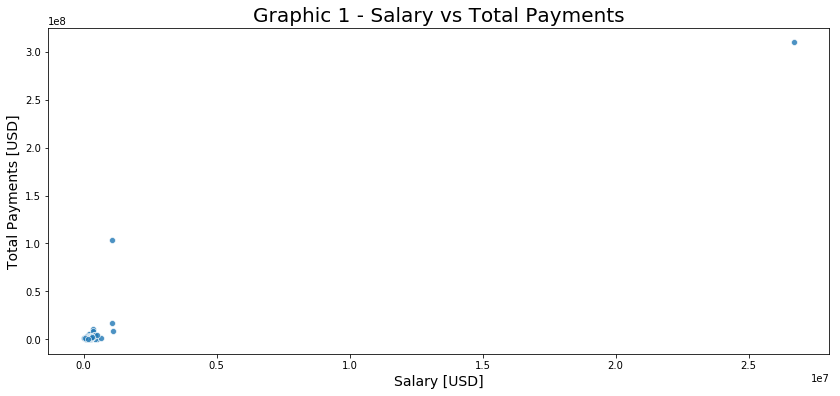

In [556]:
# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_dict.salary,           # X axis feature.
                y = df_dict.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 1 - Salary vs Total Payments', # Graphic Title.
          fontsize = 20);

Notable, there is a strange point far from the others, it is possible as outlier. Sorting the dataframe by the `salary` it is a good way to understand it.

In [557]:
# Sorting the salary, only the first 5 rows.
df_dict.query('salary != "NaN"').sort_values('salary', ascending = False)[['salary']].head()

,salary
TOTAL,26704229
SKILLING JEFFREY K,1111258
LAY KENNETH L,1072321
FREVERT MARK A,1060932
PICKERING MARK R,655037


Bear in mind, one of this observation is the `TOTAL`, which I should remove from the dataframe, because it is not an observation, it is an aggregate value.

Table 1 show the problems to be fixed in Data Cleaning.

<br><center><strong>Table 1 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is a aggregate information|

</center>

I will check all features from each employee to compute how many NaN are. If any the number of NaN reach 20 means that there are no information record for given employee.

In [558]:
# List to store the values of NaN for each employee. 
employee_nan = []

for index in df_dict.transpose():
    employee_nan.append([index, sum(df_dict.transpose()[index] == 'NaN')])

In [559]:
# Converting the List in DataFrame.
employee_nan = pd.DataFrame(employee_nan, columns = ['Employee','# NaN']).sort_values('# NaN', ascending = False)

# Printing the first 10 rows.
employee_nan.head(10)

,Employee,# NaN
84,LOCKHART EUGENE E,20
138,WHALEY DAVID A,18
56,GRAMM WENDY L,18
127,THE TRAVEL AGENCY IN THE PARK,18
143,WROBEL BRUCE,18
53,GILLIS JOHN,17
142,WODRASKA JOHN,17
25,CLINE KENNETH W,17
133,WAKEHAM JOHN,17
114,SAVAGE FRANK,17


Without no doubt the employee `LOCKHART EUGENE E` do not have any information.

In [560]:
# Printing the info from LOCKHART EUGENE E.
df_dict.loc[['LOCKHART EUGENE E']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Probably the `THE TRAVEL AGENCY IN THE PARK` is not a employee, and for this reason I also will remove it.

There are some employees, which needs some further investigation as you can see in the query below.

In [561]:
# Employees without salary and total_stock_value.
df_dict.loc[employee_nan.Employee[:10].tolist()].query('salary == "NaN"').query('total_stock_value == "NaN"')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,119292,NaN
THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,362096,False,NaN,NaN,NaN,NaN,NaN,362096,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WAKEHAM JOHN,NaN,NaN,NaN,109298,NaN,NaN,103773,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,213071,NaN
SAVAGE FRANK,NaN,NaN,-121284,125034,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,3750,NaN


I do not have any strong reason to remove them, although the most information is NaN I can not discard it.

Table 2 shows all the issues I have found in the dataset.

<br><center><strong>Table 2 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is a aggregate information.|
|2|Quality|Validity|Programmatic|Remove the `LOCKHART EUGENE E` observation because it only have NaN.|
|3|Quality|Validity|Programmatic|Remove the `THE TRAVEL AGENCY IN THE PARK` observation because it is not a employee.|

</center>

### 2.3. Data Cleaning <a id='cleaning'></a>

Fortunately, there is only one problem pointed out in the Data Assessing.

#### Issue ID 1

>**Issue:** Remove the observation TOTAL.

**Define**

* Remove from the `data_dict` the key `TOTAL`.

**Code**

In [562]:
# Copying the original dictionary.
data_dict_clean = data_dict.copy()

# Removing the key TOTAL.
data_dict_clean.pop('TOTAL');

**Test**

Visualy I can assure the `TOTAL` removal plotting the `salary` by `total_payments`.

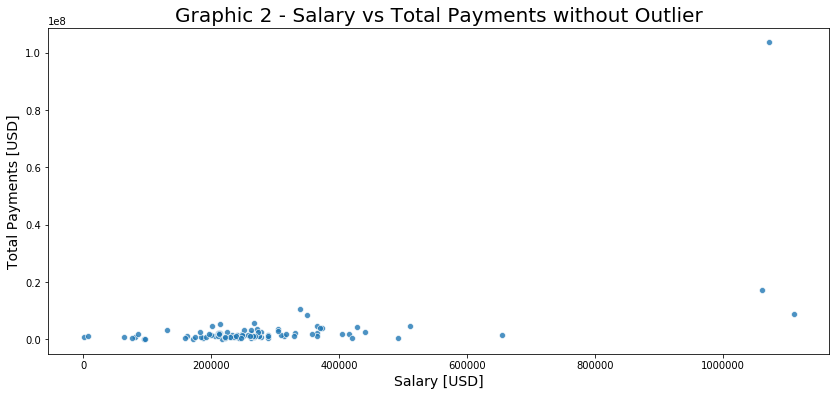

In [563]:
# Creating a dataframe to be used to plot the graphic. This is a temporaly variable.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_clean.salary,           # X axis feature.
                y = df_clean.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 2 - Salary vs Total Payments without Outlier', # Graphic Title.
          fontsize = 20);

Programmaticly I can confirm the exclusion of the `TOTAL` checking the existency in the index.

In [564]:
# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'TOTAL') # 0: removed; 1: Not removed

0

#### Issue ID 2

>**Issue:** Remove the observation LOCKHART EUGENE E.

**Define**

* Remove from the `data_dict` the key `LOCKHART EUGENE E`.

**Code**

In [565]:
# Removing the key LOCKHART EUGENE E.
data_dict_clean.pop('LOCKHART EUGENE E');

**Test**

In [566]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'LOCKHART EUGENE E') # 0: removed; 1: Not removed

0

#### Issue ID 3

>**Issue:** Remove the observation THE TRAVEL AGENCY IN THE PARK.

**Define**

* Remove from the `data_dict` the key `THE TRAVEL AGENCY IN THE PARK`.

**Code**

In [567]:
# Removing the key THE TRAVEL AGENCY IN THE PARK.
data_dict_clean.pop('THE TRAVEL AGENCY IN THE PARK');

**Test**

In [568]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'THE TRAVEL AGENCY IN THE PARK') # 0: removed; 1: Not removed

0

#### Checking Dataframe

Lastly, I have removed 3 keys due to different reasons.

Initially, the dataframe had 146 observations and I expect 143 after the cleaning process.

In [569]:
# Number of valid observations. 
print "Number of observations: ", df_clean.shape[0]

Number of observations:  143


### Task 2 - Removing Outliers <a id='task2'></a>

>**Remove outliers**

I have removed the `TOTAL` observation because it is a aggregation. The reason to keep the extreme values from LAY KENNETH L, LAVORATO JOHN J, SKILLING JEFFREY K, and other are due to removing I them I will lose information, and it still valid points.

I also have removed `LOCKHART EUGENE E` and `THE TRAVEL AGENCY IN THE PARK` because they were not good observations and only will insert noise. The latter has only NaN and the former is not a employee.

### 2.4. Exporting to JSON <a id='exporting'></a>

I have decided to export the `data_dict_clean` dictionary to a JSON file to use it in the [Tableau Public][tableau_public_url].

[tableau_public_url]: https://public.tableau.com/en-us/s/

In [570]:
# Copying
df_export = df_clean.copy()

# Converting features to float. 
df_export.deferral_payments = df_clean.deferral_payments.astype(float)
df_export.deferred_income = df_clean.deferred_income.astype(float)
df_export.director_fees = df_clean.director_fees.astype(float)
df_export.exercised_stock_options = df_clean.exercised_stock_options.astype(float)
df_export.loan_advances= df_clean.loan_advances.astype(float)
df_export.long_term_incentive= df_clean.long_term_incentive.astype(float)
df_export.restricted_stock_deferred= df_clean.restricted_stock_deferred.astype(float)

# Adding an extra columns with names.
df_export['name'] = df_export.index

# Creating a dictionary.
dict_export = df_export.to_json(orient='records')

# Writing the df_dict_clean.json in the root folder.
with open('df_dict_clean.json', mode = 'w') as file:
    file.write(dict_export)

***

## 3. Exploratory Data Analysis  <a id='eda'></a>

In consonance with the Part 6 Data Visualisation of this course, I will perform the EDA using the [Tableau Public][tableau_public_url], although this is not a requirement I will push myself to use this project as an opportunity put it in pratice.

[tableau_public_url]: https://public.tableau.com/en-us/s/

The file `df_dict_clean.json` exported in [2.4. Exporting to JSON](#exporting) was used as input of Tableau Public.

### 3.1. Tableau Public <a id='story'></a>

I have created a Story to explain the EDA process.

In [571]:
%%HTML
<div class='tableauPlaceholder' id='viz1548537594428' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nd111_project_04&#47;EDA' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548537594428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.2. Feature Engineering <a id='feature_engineering'></a>

Founded on the principle of create new features to enhance the model, I will create 4 features:

* **ratio_to_from:**

$$\text{ratio_to_from} = \frac{\text{to_messages}}{\text{from_messages}} \tag{1}$$

* **ratio_from_poi:**

$$\text{ratio_from_poi} = \frac{\text{from_poi_to_this_person}}{\text{from_messages}} \tag{2}$$

* **ratio_to_poi:**

$$\text{ratio_to_poi} = \frac{\text{from_this_person_to_poi}}{\text{to_messages}} \tag{3}$$

* **ratio_from_poi_share:**

$$\text{ratio_from_poi_share} = \frac{\text{shared_receipt_with_poi}}{\text{from_messages}} \tag{4}$$

Later in Feature Selection item, I will analise each of these new features, if it is relevant to the model I will use it, if not I just need to drop out. 

In [572]:
# Copying the df_clean, because I need a backup.
df_eda = df_clean.copy()

In [573]:
# Defining a function to create the feature engineering.
def feature_engineering(df, ratio_name, variable_numerator, variable_denominator):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function creates the ratio between two variables and store to a dataframe.               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to insert the new ratio.                                                        |
    |                                                                                                  |
    |    ratio_name: Ratio's name.                                                                     |
    |                                                                                                  |
    |    variable_numerator: The feature to be divided by the numerator.                               |
    |                                                                                                  |
    |    variable_denominator: The feature to divide the denominator.                                  |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the ratio stored as a new column.                                          |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly variable.
    temp = []
    
    # Loop to create the ratio.
    for num,den in zip(variable_numerator, variable_denominator):
        # For each value will analise if is a NaN or not.
        if den == 0:
            temp.append(0.)
        elif (num != 'NaN') & (den != 'NaN'):
            temp.append(num/float(den))
        else:
            temp.append(0.)

    # Adding the new column.
    df[str(ratio_name)] = temp
    
    return df

### Task 3 - Creating new features <a id='task3'></a>

>**Create new feature(s)**

Based on equations (1), (2), (3) and (4) and using the function `feature_engineering`, I will add to the dataset three new features.

In [574]:
# Adding the ratio_from_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_from_poi',
                    variable_numerator = df_eda.from_poi_to_this_person,
                    variable_denominator = df_eda.from_messages);

In [575]:
# Adding the ratio_to_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_to_poi',
                    variable_numerator = df_eda.from_this_person_to_poi,
                    variable_denominator = df_eda.to_messages);

In [576]:
# Adding the ratio_to_from.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_to_from',
                    variable_numerator = df_eda.to_messages,
                    variable_denominator = df_eda.from_messages);

In [577]:
# Adding the ratio_from_poi_share.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_from_poi_share',
                    variable_numerator = df_eda.shared_receipt_with_poi,
                    variable_denominator = df_eda.from_messages);

In [578]:
# Adding the ratio_from_poi_share.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_salary_total_payments',
                    variable_numerator = df_eda.salary,
                    variable_denominator = df_eda.total_payments);

I have created 5 news features.

* ratio_from_poi;
* ratio_to_poi;
* ratio_to_from;
* ratio_from_poi_share, and;
* ratio_salary_total_payments

In [579]:
# Storing the list of engineered features.
engineered_features = ['ratio_from_poi', 'ratio_to_poi', 'ratio_to_from', 'ratio_from_poi_share', 'ratio_salary_total_payments']

### Task 1 - Feature List <a id='task1'></a>

>**Select what features you'll use.**

In [580]:
features_list

['poi',
 'salary',
 'total_payments',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'from_messages',
 'to_messages']

In [581]:
# Printing some features from df_clean. First 10 rows.
df_eda[['to_messages','from_messages','shared_receipt_with_poi','ratio_from_poi','ratio_to_poi','ratio_to_from','ratio_from_poi_share']].head(10)

,to_messages,from_messages,shared_receipt_with_poi,ratio_from_poi,ratio_to_poi,ratio_to_from,ratio_from_poi_share
ALLEN PHILLIP K,2902,2195,1407,0.021412,0.022398,1.322096,0.641002
BADUM JAMES P,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BANNANTINE JAMES M,566,29,465,1.344828,0.000000,19.517241,16.034483
BAXTER JOHN C,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BAY FRANKLIN R,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BAZELIDES PHILIP J,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BECK SALLY W,7315,4343,2639,0.033157,0.052768,1.684320,0.607644
BELDEN TIMOTHY N,7991,484,5521,0.471074,0.013515,16.510331,11.407025
BELFER ROBERT,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BERBERIAN DAVID,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


I have noticed the necessity to convert the NaN value to zero. There are two kinds of NaN:

* Strings NaN, and;
* Float NaN.

The function `str_nan_to_0` will deal with the string one.

In [582]:
def str_nan_to_0(df, variable):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function converts the string NaN to zero.                                                |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to perform the conversion.                                                      |
    |                                                                                                  |
    |    variable: The columns name to be converted.                                                   |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the converted columns.                                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly list
    temp = []

    # When the NaN is a string.
    # Loop to fix the NaN values.
    for index in df[variable]:
        if index == 'NaN':
            temp.append(0)
        else:
            temp.append(float(index))
            
    # Updatind the columns with NaN with list with 0.
    df[variable] = temp
    
    return df

Let's convert all the NaN to zero.

In [583]:
# Loop to convert all columns from df_eda.
for index in df_eda:
    # These two features do not need this conversion.
    if index in ['email_address']:
        continue
    else:
        # Convert String NaN to 0.
        str_nan_to_0(df = df_eda, variable = index);
        
        # Convert float NaN to 0.
        df_eda[index] = df_eda[index].fillna(0)

In [584]:
# Saving the dataset in dictionary type.
dict_eda = df_eda.to_dict(orient = 'index')

### 3.3. `featureFormat` and `targetFeatureSplit`

These two functions are given from the project template. I have coded a function to bundle them.

In [585]:
# Following the instructions.
my_dataset = dict_eda

# This is
def wrapper_featureformatsplit(my_dataset, features_list):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function runs two scripts: featureFormat and targetFeatureSplit.                         |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    my_dataset: This is a dictionary.                                                             |
    |                                                                                                  |
    |    features_list: List of variable to be gathered from my_dataset.                               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    labels: This is the POI feature from my_dataset.                                              |
    |                                                                                                  |
    |    features: This is an array with the features_list values.                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Creating data ACCORDING to the features_list, which is input of targetFeatureSplit.
    data = featureFormat(my_dataset, features_list, sort_keys = True)

    # Using data to create labels and features.
    labels, features = targetFeatureSplit(data)
    
    # Returning the labels and features.
    return labels, features

In [586]:
# Using the defined wrapper_feat_form_split function.
labels, features = wrapper_featureformatsplit(my_dataset, original_feat)

The `labels` are the values `POI` and `non-POI`. This is what I want to predict.

In [587]:
# Printing the first labels.
labels[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

The `features` is a list where most of variables from dict_eda a stored in a nested list.

$$features = [observation_1, \dots, observation_n]$$

Where:

$$observation_1 = [variable_1, variable_2, \dots, variable_{m}] $$

Have in mind, the length of the observation is according to the `features_list`.

In [588]:
# Printing the first row of features.
features[0]

array([ 4.175000e+06,  2.869717e+06, -3.081055e+06,  0.000000e+00,
        1.729541e+06,  1.386800e+04,  2.195000e+03,  4.700000e+01,
        6.500000e+01,  0.000000e+00,  3.048050e+05,  1.520000e+02,
        1.260270e+05, -1.260270e+05,  2.019550e+05,  1.407000e+03,
        2.902000e+03,  4.484442e+06,  1.729541e+06])

### 3.3. Feature Scaling <a id='scaling'></a>

Due to the financial values varying from zero to millons dollar, this values could be dominant over the number of emails. For this reason, it is necessary to scale all features. I will use the MinMaxScaler, because this is the one used during the class.

In [589]:
# Function to scale.
def feat_scale(feat):
    """
    """
    # Importing library.
    from sklearn.preprocessing import MinMaxScaler

    # Creating the classifier to scale.
    #scaler = MinMaxScaler()
    scaler = MinMaxScaler(feature_range=(-1, 1))

    
    # Fitting the classifier.
    scaler.fit(feat)

    # Transform the data. It means: Scale the data.
    feat = scaler.transform(feat)

    # Printing the scaled data.
    return feat

In [590]:
# Scaling the features dataframe.
features = feat_scale(features)

# Printing the first row of features.
features[0]

array([ 0.04375   , -0.0896021 , -0.75839933, -1.        , -0.89929419,
       -0.87875662, -0.69445991, -0.8219697 , -0.7865353 , -1.        ,
       -0.88152409, -0.99997066, -0.68553633, -0.80730865, -0.63652905,
       -0.49030973, -0.6168724 , -0.91339415, -0.92783384])

### 3.4. Feature Selection <a id='selection'></a>

Due to the several features available, and to decrease the number of it, I have decided to use the `SelectKBest` from Scikit Learn package to perform the Feature Selection.

The reasons to opt to feature selection:

* Remove reduntat features;
* Reduce the overfitting, and;
* Reduce the computational processing time due to a simpler model, it is also provide a easier model to interpret.

_Read more about it in this reference:_ [Feature Selection][lasso]

[lasso]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf


The function below will calculate the K Best Features.

In [591]:
# General purpose function.
def feat_selection(k , feat, lab, feat_list, f_classif = 'f_classif'):
    """
    """
    # Importing the modules SelectKBest and f_classif
    from sklearn.feature_selection import SelectKBest, f_classif

    # Creating the classifier.
    selector = SelectKBest(f_classif, k = k)

    # Fitting the data.
    selector.fit(feat, lab)

    # Printing the scores.
    selector.scores_ 
    
    # Create a DataFrame to ease the Comparison.
    comparison = pd.DataFrame(zip(feat_list[1:],selector.scores_,selector.pvalues_), columns = ['feature','scores','p_values'])
    
    # Sorting the DataFrame by scores.
    comparison.sort_values('scores', ascending = False, inplace = True)
    
    # Multiple values to return.
    return comparison

I will use, for this example, all features available in data_dict.

The `wrapper_featureformatsplit` function will create the labels and features.

In [592]:
# Creating the label vector and features dataframe.
lab_example, feat_example = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = original_feat)

# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results = feat_selection(k = 5, feat = feat_example, lab = lab_example, feat_list = original_feat)

# Printing.
feat_sel_results.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


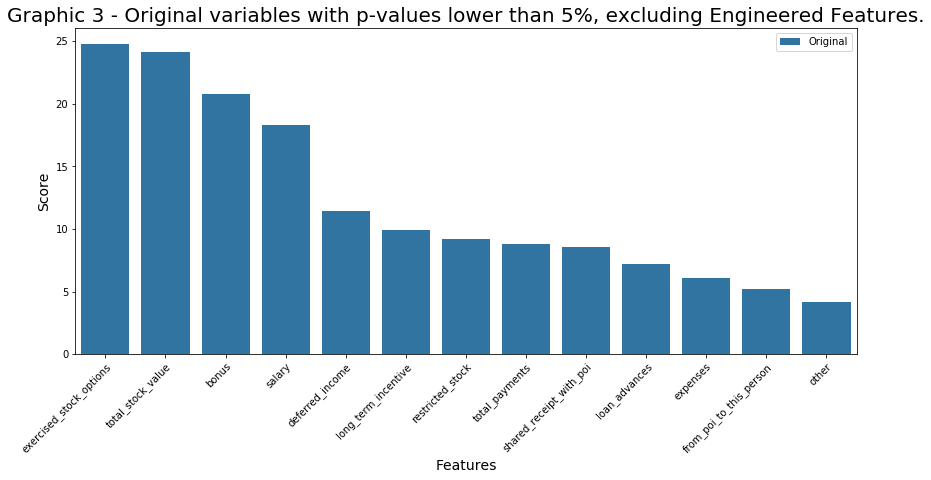

In [593]:
# Adding the hue to be comparable to the next graphic.
feat_sel_results['hue'] = 'Original'

# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results.query('p_values < 0.05').feature,
                 y = feat_sel_results.query('p_values < 0.05').scores,
                 hue = feat_sel_results.hue);
plt.title('Graphic 3 - Original variables with p-values lower than 5%, excluding Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

Assuming the $\alpha$ equal to 0.05, there are 13 features with p-values lower than $\alpha$, which means when adding these features its somehow changes the output.

I have not aggregated the features engineered.

In [594]:
# Adding to the original_feat list the engineered features.
complete_feat = original_feat + engineered_features

# Printing.
complete_feat

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio_from_poi',
 'ratio_to_poi',
 'ratio_to_from',
 'ratio_from_poi_share',
 'ratio_salary_total_payments']

In [595]:
# Creating the label vector and features dataframe.
lab_example, feat_example = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = complete_feat)

# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results_complete = feat_selection(k = 5, feat = feat_example, lab = lab_example, feat_list = complete_feat)

# Printing.
feat_sel_results_complete.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


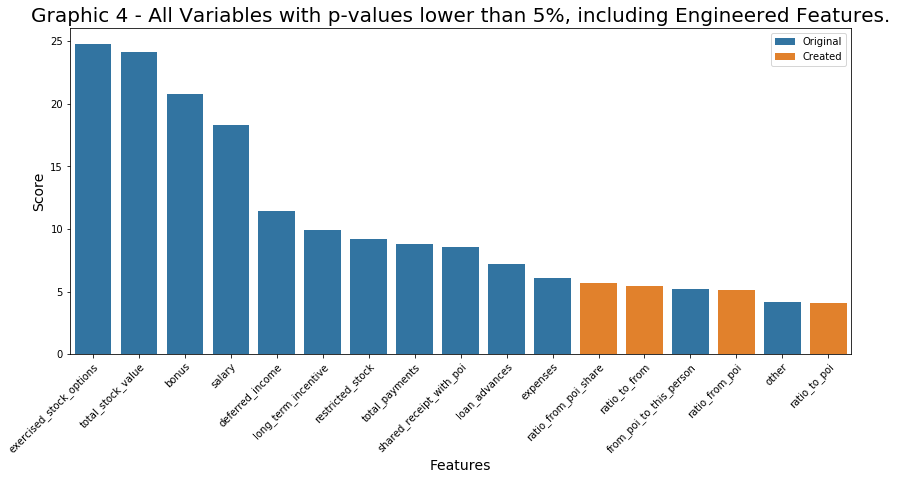

In [596]:
# Adding a new columns to use as hue in the graphic.

# Temporaly variable only to store if this is a feature engineered or not.
my_hue = []

# Loop to check it.
for feat_name in feat_sel_results_complete.feature:
    if feat_name in engineered_features:
        my_hue.append('Created')
    else:
        my_hue.append('Original')

feat_sel_results_complete['hue'] = my_hue
        
# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results_complete.query('p_values < 0.05').feature,
                 y = feat_sel_results_complete.query('p_values < 0.05').scores,
                 hue = feat_sel_results_complete.hue, dodge = False);
plt.title('Graphic 4 - All Variables with p-values lower than 5%, including Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

As you can see, there are very strong varibles to consider in the model, and the engineered features do not have a good performance, but let's give a try using the to predict.

In [597]:
# Saving the lists of features.
features_significant_original = feat_sel_results.query('p_values < 0.05').feature.tolist()
features_significant_complete = feat_sel_results_complete.query('p_values < 0.05').feature.tolist()

Let's plot the correlation map for the `features_significant_original`.

In [598]:
# Creating a function to calculate the correlation between variables.
def calc_correlation(df, feat_list):
    """
    """
    # Temporaly variable. List to store the columns values.
    temp = []

    # Loop to subset the dataframe.
    for index in feat_list:
        temp.append(df[index])

    # Correlation Calculation.
    return pd.DataFrame(np.corrcoef(temp), columns = feat_list, index = feat_list)

In [599]:
# Creating a function to plot a heatmap.
def heatmap(df_corr):
    """
    """
    plt.figure(figsize = [8,6])                  # Graph/Figure size
    ax = sns.heatmap(df_corr, linewidth=0.5)     # Heatmap
    ax.set_xticklabels(df_corr.index)            # X ticks labels
    ax.set_yticklabels(df_corr.columns)          # Y ticks labels
    plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
             ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=0,   # 0 degree labels on Y axis
             ha="right", rotation_mode="anchor")
    plt.title("Graphic 5 - Correlation Map.",
              fontsize = 20);
    plt.show()

Although this is not a requirement of this project, I feel necessity to plot the correlation between features. Just to understand a bit more about the correlation of the variables. I am afraid about adding too many variables and consequently add colinearity.

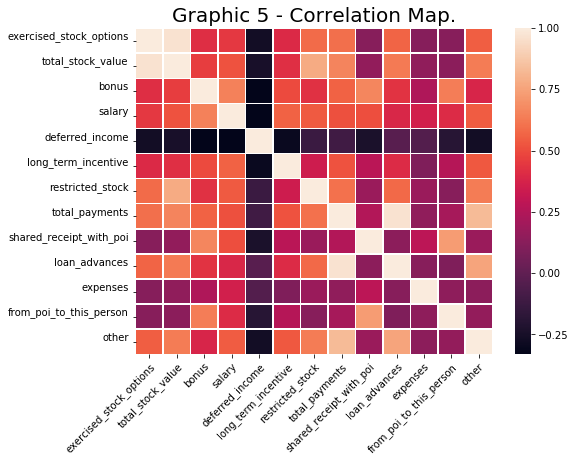

In [600]:
# Priting the heatmap.
heatmap(calc_correlation(df_eda, feat_list = features_significant_original))

As you can see, there are variables with high correlation such as:

* `total_stock_value` and `total_payments`;
* `shared_receipt_with_poi` and `from_poi_to_this_person.`, and;
* `deferred_income`which do not have any relationship with any variable.

#### 3.4.1. Evaluating the Classifiers

Let's evaluate the lists of features `features_significant_original`, `features_significant_complete`, and others using standards configuration of several classifiers.

The reason to do it is to make a sensible analysis of features selected to the final model.

Have in mind, I have employeed to this task the simplest way to divide a dataset into training and testing applying the `train_test_split` module from Scikit Learn. In future chapters I will use more sofisticated methods to split the dataset according to the complex of the task and necessity.

In [601]:
# Adding the 'poi' in the list and adding as first element as preconized by the code.
features_significant_original = ['poi'] + features_significant_original
features_significant_complete = ['poi'] + features_significant_complete

I have created a function to bundle code lines because it could be repeativily.

In [602]:
# Function to create the dataset of features according to the features selected.
def create_traintest(my_data_dict, feat_list):
    """
    This function apply the function wrapper_featureformatsplit to create the
    labels vector and features matrix, then scale it and finally create the training
    and testing dataframes.
    """
    from sklearn.model_selection import train_test_split
    
    # Create the Labels vector and Features Matrix.
    lab, feat = wrapper_featureformatsplit(my_dataset = my_data_dict, features_list = feat_list)
    
    # Scaling the Feature Matrix due to the extreme values.
    feat = feat_scale(feat)
    
    # Spliting the data into training and testing.
    features_train, features_test, labels_train, labels_test = train_test_split(feat, lab, test_size=0.3, random_state=42)
    
    # Returning a list.
    return features_train, features_test, labels_train, labels_test

Unfortunately, I have to tuned/calibrate the classifier construction so I will use the regular/default values as starter. This function is a straightforward way to evaluate each list of selected features.

In [603]:
def select_fit_evaluate(classifier, train_test_data):
    """
    """
    # Unzipping the list from the create_traintest funciton.
    feat_train, feat_test, lab_train, lab_test = train_test_data
    
    # List of Classifier and parameters.
    list_class = {'ada':('ada', AdaBoostClassifier(n_estimators=100)),
                  'svc':('svc', SVC(gamma='auto')),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier(n_neighbors=5)),
                  'random':('rand', RandomForestClassifier(n_estimators = 100))}
    
    # Creating the Pipeline.
    pipeline_ = Pipeline([list_class[classifier]])
    
    # Fitting.
    pipeline_.fit(feat_train,lab_train)
    
    # Predicting.
    pred_t = pipeline_.predict(np.array(feat_test))
        
    # Calculating the accuracy.
    acc = accuracy_score(lab_test, pred_t)
    
    # Calculating the recall. It is an array of (recall non-POI, recall POI)
    recall = recall_score(y_true = lab_test, y_pred = pred_t, average = None)

    # Calculating the precision. It is an array of (precision non-POI, precision POI)
    precision = precision_score(y_true = lab_test, y_pred = pred_t, average = None)
    
    # Return the accuracy.
    return acc, recall.tolist(), precision.tolist()

So far I have created 4 lists of features.

* original_feat: All 20 features from original source;
* complete_feat: All 20 features from `original_feat` + 5 Enginereed Features;
* features_significant_original: Filtered features from `original_feat` using `SelectKBest`, and;
* features_significant_complete: Filtered features from `complete_feat` using `SelectKBest`.

In [604]:
print "original_feat", len(original_feat)
print "complete_feat", len(complete_feat)
print "features_significant_original", len(features_significant_original)
print "features_significant_complete", len(features_significant_complete)

original_feat 20
complete_feat 25
features_significant_original 14
features_significant_complete 18


In [605]:
# All list I have created so far.
all_list = [original_feat, complete_feat, features_significant_original, features_significant_complete]

The follow function will create a table of comparison of a given list of features.

In [727]:
# Creates a table of comparison.
def comparison_metrics(classifier, list_of_list):
    """
    """
    # Compute the time consuming.
    import time
    
    # Tracking the time.
    t_start = time.time()
    
    # Temporaly variables to store the values of accuracy, recall and precision.
    acc = [] # Accuracy
    recall = [] # recall from poi and non-poi
    precision = [] # precision from poi and non-poi

    # Loop to calculate for each list of features the accuracy, precision and recall.
    for index in list_of_list:
        # Unloading the values calculated by select_fit_evaluate function. 
        i_acc,\
        i_recall,\
        i_precision = select_fit_evaluate(classifier = classifier,
                                          train_test_data = create_traintest(my_dataset,
                                                                             feat_list = index))
        
        # Appending the values in the list.
        acc.append(i_acc)
        recall.append(i_recall)
        precision.append(i_precision)

    # Converting to DataFrame.
    acc = pd.DataFrame(acc, columns = ['accuracy'])
    recall = pd.DataFrame(recall, columns = ['recall_non_poi','recal_poi'])
    precision = pd.DataFrame(precision, columns = ['precision_non_poi','precision_poi'])

    # Merging.
    comparison = acc.join(recall).join(precision)

    # Renaming the rows.
    comparison.index = ['original_feat','complete_feat','features_significant_original','features_significant_complete']

    # Tracking the time
    t_end = time.time()
    
    print "Duration:", round((t_end - t_start)/60, 4), "minutes"
    
    # Printing the results.
    return comparison

Let's compare using different algorithms classifiers.

### Task 4 - Try a varity of classifiers <a id='task4'></a>

>**Try a varity of classifiers**

In [728]:
comparison_metrics(classifier = 'gauss', list_of_list = all_list)

Duration: 0.0007 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.395349,0.342105,0.8,0.928571,0.137931
complete_feat,0.372093,0.342105,0.6,0.866667,0.107143
features_significant_original,0.860465,0.921053,0.4,0.921053,0.400000
features_significant_complete,0.860465,0.921053,0.4,0.921053,0.400000


In [722]:
comparison_metrics(classifier = 'random', list_of_list = all_list)

Duration: 0.0247 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.906977,1.000000,0.2,0.904762,1.0
complete_feat,0.906977,1.000000,0.2,0.904762,1.0
features_significant_original,0.883721,0.973684,0.2,0.902439,0.5
features_significant_complete,0.906977,1.000000,0.2,0.904762,1.0


In [723]:
comparison_metrics(classifier = 'ada', list_of_list = all_list)

Duration: 0.0176 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.813953,0.894737,0.2,0.894737,0.200000
complete_feat,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_original,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_complete,0.837209,0.921053,0.2,0.897436,0.250000


In [724]:
comparison_metrics(classifier = 'tree', list_of_list = all_list)

Duration: 0.0005 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.837209,0.921053,0.2,0.897436,0.250000
complete_feat,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_original,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_complete,0.860465,0.947368,0.2,0.900000,0.333333


In [725]:
comparison_metrics(classifier = 'knn', list_of_list = all_list)

Duration: 0.0007 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.837209,0.947368,0.0,0.878049,0.0
complete_feat,0.837209,0.947368,0.0,0.878049,0.0
features_significant_original,0.883721,1.000000,0.0,0.883721,0.0
features_significant_complete,0.860465,0.973684,0.0,0.880952,0.0


In [726]:
comparison_metrics(classifier = 'svc', list_of_list = all_list)

Duration: 0.0005 minutes


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.883721,1.0,0.0,0.883721,0.0
complete_feat,0.883721,1.0,0.0,0.883721,0.0
features_significant_original,0.883721,1.0,0.0,0.883721,0.0
features_significant_complete,0.883721,1.0,0.0,0.883721,0.0


Without any tuning/calibration the Gauss, AdaBoost, and Random Forest are performed the better results.

The `original_feat` and `complete_feat` are calculated only as reference to the `features_significant_original` and `features_significant_complete`.

Have in mind, from the lists `features_significant_original` and `features_significant_complete`, I will refine the right number of features to use for further study, because both list have all features with statistical significance. Recall, the possible combination using or not all features:

* `features_significant_original` has 14 features, which means 16,384 combinations ($2^{14}$), and;
* `features_significant_complete` has 18 features, which means 262,144 combinations ($2^{18}$).

Clearly, it is possible to find the global optimal due to the few number of combinations, but I will use a different approach using a Multiobjective Genetic Algorithm.

#### 3.4.1. Algorithm to Select the Features

This part of the project went a bit out of control due to the effort to code an Genetic Algorithm from zero.

The following chunks were used to define all functions necessary to run a Genetic Algorithm called NSGA-2 [(A fast and elitist multiobjective genetic algorithm: NSGA-II)][k_deb].

[k_deb]: https://ieeexplore.ieee.org/document/996017

##### Objective Function

I have used the Accuracy, Precision, Recall, and the number of features as metrics to evaluate each candidate as the optimized set of features. The main reason to use this algorithm is a kind of kick off of set of features.

$$\text{maximize } \text{ \{accuracy, recall, precision\} }$$
$$\text{minimize } \text{ \{number of features\} }$$


Unfortunatelly, I have not implemented the best way to evaluate each candidate (a random set of features), because it could take too long time to finish using a regular computer. So, do not blame me, I have only considered a "single run" for each candidate using the simple Naïve Bayes classifier and then calculate the metrics.

Bear in mind, I have used for this first step the output average of an Stratified KFolds.

##### Explanation

There is no garantee selecting the first features ranked by the `SelectedKBest` it will produce a "very good" optimized solution, for this reason I have opted to use the NSGA2 to search a "third way" solution.

Founded on the principle of the [ceteris paribus][ceteris_paribus] where I only make changes in a small part of the problem and keeps everything constant, I will evaluate each candidate and the most promisor will be picked to the next step.

[ceteris_paribus]: https://en.wikipedia.org/wiki/Ceteris_paribus

In [613]:
# Metrics to evaluate each chromosome.
metrics = ['accuracy', 'precision_non_poi', 'precision_poi', 'recall_non_poi', 'recall_poi', 'qty_features']

In [614]:
def individual(genes):
    """
    This function creates a vector that minetizes the chromosomes, each
    gene is a feature selected (1: selected, 0: not selected).
    """
    return np.random.choice([0, 1], genes, 0.5)

In [615]:
def population(n, genes):
    """
    This functions creates a population using several times the individual() function.
    """
    df = []

    for index in range(0,n):
        df.append(individual(genes))
    
    return pd.DataFrame(df).transpose()

In [616]:
def crossing_over(ind_1, ind_2):
    """
    
    """
    cross = np.random.choice(range(1,len(ind_1)),1)

    crossed_1 = ind_1[:cross[0]] + ind_2[cross[0]:]
    crossed_2 = ind_2[:cross[0]] + ind_1[cross[0]:]
    
    return pd.DataFrame([crossed_1, crossed_2], index = ['crossed_1', 'crossed_2']).transpose()

In [617]:
def random_picker(df, n):
    """
    This function will be used to random draw individuals from the current population.
    """
    return df.sample(n, axis = 1)

In [618]:
def reproduction(df, n):
    """
    This function control the reproduction given a random_picker population.
    """
    temp = pd.DataFrame()

    for index in range(0, n+1):
        draw_individual = random_picker(df, 2)
        new_individuals = crossing_over(draw_individual.iloc[:,0].tolist(),
                                        draw_individual.iloc[:,1].tolist())
        if index == 1:
            temp = new_individuals
            temp.columns = range(0, temp.shape[1])
        else:
            temp = temp.join(new_individuals)
            temp.columns = range(0, temp.shape[1])
    
    # Renaming to avoid problem with joining.
    temp.columns = map(lambda x : 'x' + str(x), temp.columns)
    
    return temp

In [619]:
def mutation_gene(ind):
    """
    This function perform the gene mutation.
    """
    gen = np.random.choice(range(0,len(ind)),1)

    if ind[gen[0]] == 0:
        ind[gen[0]] = 1
    else:
        ind[gen[0]] = 0

    return ind

In [620]:
def mutation_pop(pop_to_mutate):
    """
    This function creates the mutates person from the given population.
    """
    
    temp = []

    for index in pop_to_mutate:
        temp.append(mutation_gene(pop_to_mutate.loc[:,index].tolist()))

    temp = pd.DataFrame(temp).transpose()

    temp.columns = map(lambda x : 'm' + str(x), temp.columns)

    return temp

In [706]:
parameters = {}

# Creating the Fit evaluation 
def fit_evaluation(module, feat, lab, n_splits, classifier, random_state = None, test_size = 0.25, parameters = parameters):
    """
    module= kfolds or sss
    """
    
    # Converting to array.
    X = np.array(feat)
    y = np.array(lab)
    
    # Dictionary of Classifiers and Constructors.
    list_class = {'ada':('ada', AdaBoostClassifier()),
                  'svc':('svc', SVC()),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier()),
                  'rand':('rand', RandomForestClassifier())}
    
    # Initializing empty lists.
    acc_mean = []
    recall_non_poi_mean, recall_poi_mean = [], []
    precision_non_poi_mean, precision_poi_mean = [], []
    
    # ========== STRATIFIED KFOLDS ITERABLE ============== #
    
    # Select the kind of generate training and testing dataset.
    if module == 'skfolds':
    
        # Creating the iterable.
        iterable = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state)

    # ========= STRATIFIED SHUFFLE SPLIT ITERABLE ======== #
    
    elif module == 'sss':
        # Creating the iterable.
        iterable = StratifiedShuffleSplit(n_splits = n_splits, test_size = test_size, random_state = random_state)
    
        # Divide into n_splits.
        iterable.get_n_splits(X, y)

    # ERROR!
    else:
        print "ERROR! - fit_evaluation - Non-valid module value"
        
    # Loop to create the train and test dataset.
    for train_index, test_index in iterable.split(X, y):
        
        # Subsetting to create the features and labels.    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # ========================== Stratified KFolds =====================================+
        if module == 'skfolds':
      
            # Creating the Pipeline.
            pipeline = Pipeline([list_class[classifier]])

            # Fitting.
            pipeline.fit(X_train,y_train)

            # Predicting.
            pred = pipeline.predict(np.array(X_test))
            
        # ========================== Stratified Shuffle Split ===============================
        elif module == 'sss':
            
            # Creating the Pipeline.
            pipeline = Pipeline([list_class[classifier]])

            # Creating the GridSearch Object.
            clf = GridSearchCV(estimator = pipeline,                  # Pipeline
                               param_grid = parameters,               # Parameters to be tested.
                               cv = None)                             # Third party cross validation.

            # Fitting.
            clf.fit(X_train, y_train)

            # Predicting.
            pred = clf.predict(X_test)
        
        # ERROR
        else:
            print "ERROR! - fit_evaluation - Non-valid module value"
        
        # ================= METRICS =======================#
        
        # Calculating the Recall, Precision, and Accuracy.
        recall_non_poi, recall_poi = recall_score(y_test, pred, average = None)
        precision_non_poi, precision_poi = precision_score(y_test, pred, average = None)
        acc = accuracy_score(y_test, pred)
              
        # Appending the values.
        acc_mean.append(acc)
        recall_non_poi_mean.append(recall_non_poi)
        recall_poi_mean.append(recall_poi)
        precision_non_poi_mean.append(precision_non_poi)
        precision_poi_mean.append(precision_poi)
    
    return np.mean(acc_mean), np.mean(recall_non_poi_mean), np.mean(recall_poi_mean), np.mean(precision_non_poi), np.mean(precision_poi)

In [681]:
def cost_function(module, df, list_feat, parameters,
                  classifier, n_splits = 3,
                  random_state = None, test_size = 0.25, my_dataset = my_dataset):
    """
    """
    # Reseting the index.
    df.columns = range(0, df.shape[1])
    
    # Dictionary to store temporaly data.
    my_test_dict = {}

    # Loop: For each column I will use to "filter" my features.
    for value in df.columns:
        # Converting 0/1 vector in boolean.
        select = df.iloc[:,value].astype(bool).tolist()

        # Removing the first element. POI
        work_list = list_feat[1:] 

        # Converting to DataFrame to easy the use.
        work_list_df = pd.DataFrame(work_list, columns = ['feat'])

        # Selecting the desired features and adding the 'poi' feature.
        work_list_updated = ['poi'] + work_list_df[select].feat.tolist()
        
        # Selecting the Chromosome Features.
        lab, feat = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = work_list_updated)        
        
        # Calculating the values of accuracy, recall, and precision.
        acc,\
        recall_non_poi, recall_poi,\
        precision_non_poi, precision_poi = fit_evaluation(module,
                                                feat, lab,
                                                n_splits,
                                                classifier, random_state = random_state)
 
        # Adding values to a dictionary.
        my_test_dict[value] = {'accuracy':acc,
                               'recall_non_poi':recall_non_poi,
                               'recall_poi':recall_poi,
                               'precision_non_poi':precision_non_poi,
                               'precision_poi':precision_poi}

    # Returning as DataFrame.
    return pd.DataFrame(my_test_dict).transpose()

In [623]:
def dominance_observation(df,row, metrics = metrics):
    """
    """
    # Counter to keep track the for.
    counter = 0

    # Comparison: Greater or not.
    results = []

    # Metrics in my dafatframe.
    #metrics = ['accuracy', 'precision_non_poi', 'precision_poi', 'recall_non_poi', 'recall_poi']

    # Loop to compare each observation with all features.
    for feat in metrics:
        if counter == 0:
            results = (df[feat] >= df[feat][row])
        else:
            results = results & (df[feat] >= df[feat][row])
        
        counter += 1
        
    return sum(results.tolist())

In [624]:
def qty_features(df, pop, list_feat):
    """
    Recall: Converting a minimization problem to a maximization.
    """
    # Temporaly variable to store the number of features by observation.
    qty_feat = []

    # Loop to calculate each number of features.
    for i in pop.columns:
        # Insert value in a list.
        qty_feat.append(len(list_feat) - 1 - int(sum(pop.loc[:,i])))

    # Adding a new column.
    df['qty_features'] = qty_feat
        
    return df

In [625]:
def dominancy(df):
    """
    """
    
    # Temporaly variable to store the dominancies values of each individual.
    dom = []
    
    # Loop to calculate the dominance.
    for row in df.index:
        
        # Appending the dominance to a list.
        dom.append(dominance_observation(df,row))
    
    # Adding a new column called dominancy and assign it the dominace values.
    df['dominancy'] = dom
    
    return df

In [626]:
def elitism(df, df_pop, elitism_level = 50, pop_size = 200):
    """
    This functions aims to select the dominant frontiers defined by elitism_level.
    """
    # If the filter is too much restrict.
    if df.query('dominancy < {}'.format(elitism_level)).shape[0] < pop_size:
        
        df_elit = df.sort_values('dominancy')[:pop_size]
    
        df_non_elit = df.sort_values('dominancy')[pop_size:]
    
    else:
        
        # Filtering the elitism_level. ATENTION: METRICS not POPULATION.
        df_elit = df.query('dominancy < {}'.format(elitism_level))
    
        # Filtering the non elitims.
        df_non_elit = df.query('dominancy >= {}'.format(elitism_level))

    # Gathering the index to filter the population.
    elit = df_elit.index

    # Filtering the population using the elit vector.
    pop_elit = df_pop.loc[:,elit]

    # Returning 3 dataframes. 1) Elitism, 2) Non-elitism, 3) Elit Population.
    return df_elit, df_non_elit, pop_elit        

In [627]:
def crow_dist_feat(df, feat):
    """
    """
    # Temporaly variable to store the values of crowding distance for a given feature feat.
    temp = []
    
    # Subsetting the given dataframe. I need to sort the dataframe.
    df_copy = df.sort_values(feat, ascending = False)

    # Counter to keep track the index of the dataframe.
    counter = 0

    # Loop "calculate" the crowding distance according to the conditions.
    for ind in df_copy.index:
        
        # Repeated higher values. If TRUE the boundary values are repeated.
        repeat_higher = (df_copy.iloc[[counter]][feat].tolist()[0] == df_copy[feat].max())
    
        # Repeated lower values. If TRUE the boundary values are repeated.
        repeat_lower = (df_copy.iloc[[counter]][feat].tolist()[0] == df_copy[feat].min())    
        
        # 1: First and last elements of the frontier always 10**9
        if (counter == 0) | (counter == len(df_copy.index)):
            temp.append(1000000000)
        
        else:
            if repeat_higher | repeat_lower:
                temp.append(1000000000)
            else:
                numerator = df_copy.iloc[[counter - 1]][feat].tolist()[0] - df_copy.iloc[[counter + 1]][feat].tolist()[0]
                denominator = df_copy[feat].max() - df_copy[feat].min()
                temp.append(numerator/float(denominator))
        
        # Updating the counter
        counter += 1
    
    # Adding the crowding distance for one varible to the dataframe. I want the index.
    df_copy['crow_dist'] = temp
    
    # Sorting by index to return.
    df_copy = df_copy.sort_index()
    
    # Returning only indexes and crowding distance for one variable.
    return df_copy[['crow_dist']]

In [628]:
def crow_dist_frontier(df, feat):
    """
    """
    
    counter = 0

    lista_nova = []

    for i in df.dominancy.unique().tolist():
        if counter == 0:
            lista_nova = crow_dist_feat(df.query('dominancy == {}'.format(i)), feat)
        else:
            lista_nova = lista_nova.append(crow_dist_feat(df.query('dominancy == {}'.format(i)), feat))

        counter += 1

    return lista_nova.sort_index()

In [629]:
def crowding_distance(df, metrics = metrics):
    """
    """
    counter = 0
    
    df['crow_dist'] = 0
    
    #metrics = ['accuracy' ,'precision_non_poi' ,'precision_poi' ,'recall_non_poi' ,'recall_poi']
    
    for metric in metrics:
        if counter == 0:
            df['crow_dist'] = crow_dist_frontier(df, metric)
        else:
            df['crow_dist'] = df[['crow_dist']] + crow_dist_frontier(df, metric)
        
        counter += 1
    
    return df

In [630]:
def choose_parents(parent, population):
    """
    This function choose the crossing over mother/father.
    Criterias to select:
       1. Lowest Dominacy
       2. Highest Crowding Distance
    """
    # Situations
    
    # 1. When both individuals have the same dominance.
    parents_equal_dominance = parent['dominancy'].tolist()[0] == parent['dominancy'].tolist()[1]
    
    # 2. When both individuals have the same crowding distance 
    parents_equal_crowding_distance = parent['crow_dist'].tolist()[0] == parent['crow_dist'].tolist()[1]

    # First criteria to select the winner is dominance.
    # If the dominance is equal.
    if parents_equal_dominance:
        # Second criteria to select the winner is crowding distance.
        # If the crowding distance is equal.
        if parents_equal_crowding_distance:
            # If both dominance and crowding distance are equal. Random choice.
            mother = np.random.choice(parent.index.tolist(), 1).tolist()[0]
        else:
            # Winner = Highest crowding distance.
            mother = parent[['crow_dist']].sort_values('crow_dist', ascending = False).index[0]
    else:
        # Winner = Lowest dominance
        mother = parent[['dominancy']].sort_values('dominancy').index[0]
    
    # Return the winner.
    return population.loc[:,[mother]]

In [631]:
def tournament(df, population):
    """
    
    """
    # Random draw of 4 postulants to be father/mother
    pool = df.sample(4, axis = 0)

    # Selecting the first 2 lines as first combat (tournament).
    combat_1 = pool.iloc[:2]
    
    # The function choose_parents select the winner. 
    parente_1 = choose_parents(combat_1, population)

    # Selecting the last 2 lines as second combat (tournament).
    combat_2 = pool.iloc[2:]
    
    # The function choose_parents select the winner.
    parente_2 = choose_parents(combat_2, population)
    
    # Creating a DataFrame to return it.
    parente_1[str(parente_2.columns[0])] = parente_2

    return parente_1

In [632]:
def reproduction_v2(df, population, n):
    """
    This function control the reproduction given a tournament.
    """
    temp = pd.DataFrame()

    for index in range(0, n+1):
        draw_individual = tournament(df, population)
        new_individuals = crossing_over(draw_individual.iloc[:,0].tolist(),
                                        draw_individual.iloc[:,1].tolist())
        if index == 1:
            temp = new_individuals
            temp.columns = range(0, temp.shape[1])
        else:
            temp = temp.join(new_individuals)
            temp.columns = range(0, temp.shape[1])
    
    # Renaming to avoid problem with joining.
    temp.columns = map(lambda x : 'x' + str(x), temp.columns)
    
    return temp

In [633]:
def rm_duplicated(df, pop):
    """
    """
    # Selection vector. I will use it to select the duplicated individuals.
    selection = pop.T.duplicated()
    print "Duplicated Chromosomes:", sum(selection)

    # Dropping the Duplicated.
    pop = pop.T[np.logical_not(selection)].T

    # Removing the same individuals from df_metrics.
    df = df.loc[pop.T.index]
    
    return df, pop

In [634]:
def rm_invalid_chromosomes(pop):
    """
    """
    rm = []

    for i in pop.columns:
        # Insert value in a list.
        if (sum(pop.loc[:,i]) == 0) | (sum(pop.loc[:,i]) == 1):
            rm.append(i)
        else:
            continue

    return pop.drop(columns = rm)

In [635]:
def qty_features(df, pop, list_feat):
    """
    """
    # Temporaly variable to store the number of features by observation.
    qty_feat = []

    # Loop to calculate each number of features.
    for i in pop.columns:
        # Insert value in a list.
        qty_feat.append(len(list_feat) - 1 - int(sum(pop.loc[:,i])))

    # Adding a new column.
    df['qty_features'] = qty_feat
        
    return df

Finally, after define all functions of the NSGA-2, it is possible to run this Genetic Algorithm.

#### 3.4.2. NSGA2 Wrapper

This kind of wrapper function will be used to call the several subroutines underlying in the Genetic Algorithm.

In [672]:
def NSGA2(generation, pop_size, feat_list, mutation_rate = 0.1):
    """
    """
    import warnings
    warnings.filterwarnings("ignore")

    import time
    
    # Keep the time elapse.
    t0 = time.time()
    
    # Counter to coount the number of generations.
    counter = 0
    
    # Number of Chromosomes to be mutate.
    x_rate = pop_size * mutation_rate

    print "=========== Initializing the Population ==========="
    
    # Initial Population
    pop_work = population(pop_size, len(feat_list) - 1)
    print "Population Size:", pop_work.shape[1]

    # Calculating the accuracy, recall, and precision
    print "Calculating Accuracy, Precision, and Recall."
    df_metrics = cost_function('skfolds', pop_work, feat_list, parameters, 'gauss')

    # Number of Features.
    df_metrics = qty_features(df_metrics, pop_work, feat_list)
    
    # Calculating the Dominance.
    print "Calculating Dominancy."
    df_metrics = dominancy(df_metrics)

    # Calculating the Crowding Distance.
    print "Calculating Crowding Distance."
    df_metrics = crowding_distance(df_metrics)

    print "\n============== Aging the Population ==============="
        
    while(counter <= generation):
        
        print "\nGeneration:", counter
        print "----------"
        
        # Number of offspring to reach 2N (2 * pop_size)
        offspring = (2 * pop_size  - df_metrics.shape[0])/2
                
        # Crossing Over.
        pop_work = pop_work.join(reproduction_v2(df_metrics,pop_work, offspring))
        print "Population after Crossing Over:", pop_work.shape[1]

        # Mutation
        pop_work = pop_work.join(mutation_pop(random_picker(pop_work, int(x_rate) )))
        print "Population after Mutation:", pop_work.shape[1]

        # Cleaning the Population. Removing invalid Chromosomes. 
        pop_work = rm_invalid_chromosomes(pop_work)
                
        # Calculating the accuracy, recall, and precision
        print "Calculating Accuracy, Precision, and Recall."
        df_metrics = cost_function('skfolds', pop_work, feat_list, parameters, 'gauss')
                                    
        # Number of Features.
        df_metrics = qty_features(df_metrics, pop_work, feat_list)     
        
        # Calculating the Dominancy.
        print "Calculating Dominancy."
        df_metrics = dominancy(df_metrics)
        
        # Calculating the Crowding Distance.
        print "Calculating Crowding Distance."
        df_metrics = crowding_distance(df_metrics)

        # Removing duplicated
        df_metrics, pop_work = rm_duplicated(df_metrics, pop_work)
        print "Removing Duplicated Chromosomes."
        
        # Elitism
        print "Filtering using Elitism."
        df_metrics, _, pop_work = elitism(df_metrics, pop_work, 30, pop_size)
        
        print "Population after Elitism and removing duplicated:", pop_work.shape[1]

        # Update counter.
        counter += 1

    # Converting the complement of qty_features to the real quantity of features.
    df_metrics['qty_features'] = len(feat_list) - df_metrics.qty_features - 1
        
    print "\n=================== FINISH! ======================="
    
    print "\n\nDuration:", round((time.time() - t0)/60, 2), "minutes"
    
    return df_metrics, pop_work

#### 3.4.3. Simulations

I will use the NSGA2 to find an optimized set of features from `features_significant_original` and `features_significant_complete` list of variables.

The algorithm configuration:

* Generations: 10;
* Individuals: 500, and;
* Mutation rate: 20% (over 500).

Have in mind, I have not used higher numbers of Generations and Individuals because it is not necessary much of them to reach the 0.3 of precision and recall.

##### 3.4.3.1. Selecting Features from `features_significant_original`

The next simulations uses the Naïve Bayes as baseline because this is classifier was the one whom have performed the better result using **default** parameters.

In [685]:
# Defining random seed.
np.random.seed(42)

# Running the Genetic Algorithm.
df_metrics_original, pop_original = NSGA2(generation = 10, pop_size = 500,
                                          feat_list = features_significant_original, mutation_rate = 0.2)

=========== Initializing the Population ===========
Population Size: 500
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.

============== Aging the Population ===============

Generation: 0
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 151
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 500

Generation: 1
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 196
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 500

Generation: 2
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating 

Let's see the results.

In [686]:
# First 10 rows.
df_metrics_original.sort_values('dominancy').head(10)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy,crow_dist
582,0.884983,0.886364,0.500000,0.958943,0.388889,4,1,1.781858e-01
321,0.632985,0.875000,1.000000,0.675926,0.388889,3,1,1.000000e+09
41,0.890660,0.926829,0.750000,0.974786,0.333333,5,1,1.745758e-02
332,0.628276,0.500000,0.125000,0.657908,0.444444,3,1,1.000000e+09
358,0.605532,0.925000,1.000000,0.631579,0.444444,3,1,3.000000e+09
397,0.618192,0.878788,1.000000,0.655556,0.400000,3,1,1.000000e+09
421,0.885908,0.928571,0.750000,0.951016,0.444444,6,1,2.929551e-01
435,0.874295,0.909091,0.666667,0.968414,0.322222,3,1,1.076353e-01
479,0.625397,0.918919,0.666667,0.647884,0.466667,4,1,1.297632e-01
304,0.844094,0.833333,0.000000,1.000000,0.055556,3,1,2.000000e+09


As you can see the results is not a single individual with the optimized solution, the NSGA2 gives a set of optimal solutions divided into frontier, and I have to select the one that fits my needs.

Plotting a graphic to show the Pareto Frontier is a good option to get aquitance with the results. I have decide to plot a 2D graphic using the two most important evaluation variables for me: **Precision and Recall from POI**.

In [687]:
# Defining a function to plot a graphic of Pareto Frontier.
def plot_pareto(df, title, x_label, y_label, var_1 , var_2 , hue, footnote = ''):
    """
    Straightforward scatterplot.
    """
    plt.figure(figsize = [14,6])
    sns.scatterplot(x = df[var_1],
                    y = df[var_2],
                    hue = df[hue]);
    plt.xlabel(x_label, fontsize = 14);
    plt.ylabel(y_label, fontsize = 14);
    plt.title(title, fontsize = 20);
    plt.figtext(0.995, 0.01, footnote, ha='right', va='bottom')

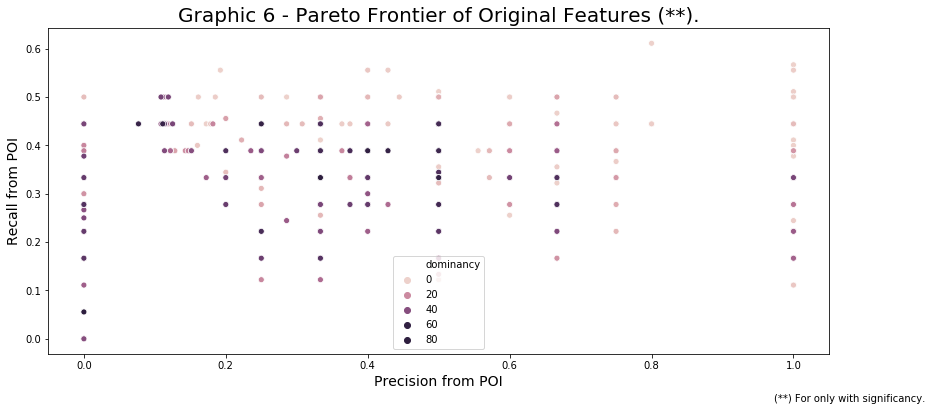

In [688]:
# Plottling the Pareto frontier.
plot_pareto(df = df_metrics_original, title = "Graphic 6 - Pareto Frontier of Original Features (**).",
            x_label = 'Precision from POI', y_label = 'Recall from POI',
            var_1 = 'precision_poi', var_2 = 'recall_poi', hue = 'dominancy',
            footnote = '(**) For only with significancy.');

Altough this algorithm uses 6 dimensions to evaluate each set of features the plot using a regular 2D scatterplot provided a good view of the results, analyzing the solutions with low dominancy values, there is a visible trade-off (Pareto Frontier) between Recall and Precision, as expected from an output of _a posteriori_ Genetic Algorithm.

Let's dive on the solutions histograms.

In [689]:
# Simple function to plot histograms.
def plot_histogram(df, title, x_label, y_label, var_1 , var_2):
    """
    Simple histogram.
    """
    plt.figure(figsize = [14, 6])
    sns.distplot(df[var_1])
    sns.distplot(df[var_2])
    plt.legend(('POI','non-POI'));
    plt.xlabel(x_label, fontsize = 14);
    plt.ylabel(y_label, fontsize = 14);
    plt.title(title, fontsize = 20);

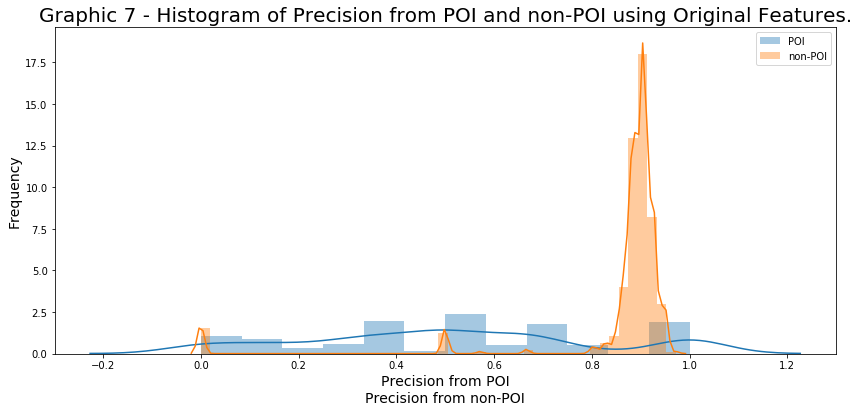

In [690]:
# Plotting the Precision's Histogram.
plot_histogram(df = df_metrics_original, title = 'Graphic 7 - Histogram of Precision from POI and non-POI using Original Features.',
               x_label = 'Precision from POI\nPrecision from non-POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'precision_non_poi')

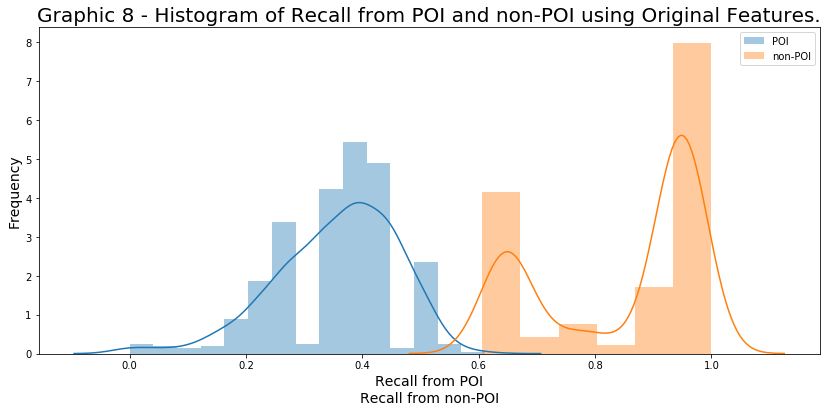

In [691]:
# Plotting the Recall's Histogram.
plot_histogram(df = df_metrics_original, title = 'Graphic 8 - Histogram of Recall from POI and non-POI using Original Features.',
               x_label = 'Recall from POI\nRecall from non-POI', y_label = 'Frequency',
               var_1 = 'recall_poi', var_2 = 'recall_non_poi')

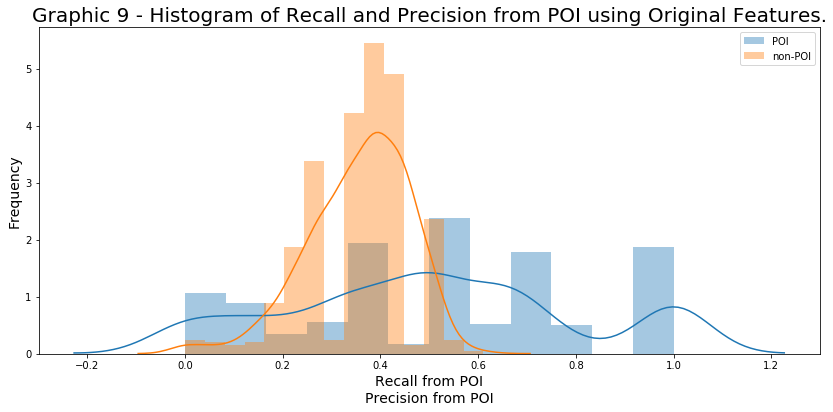

In [692]:
# Comparison Histogram of Recall and Precision.
plot_histogram(df = df_metrics_original, title = 'Graphic 9 - Histogram of Recall and Precision from POI using Original Features.',
               x_label = 'Recall from POI\nPrecision from POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'recall_poi')

The histograms comparison are quite complicated to understand because of the difference of the number of observation from POI and non-POI. I have not divided the dataset into several folds because 

Using `random_state=42` I have:

* in `label_test`:
    * 5 POI
    * 38 Non-POI

>What it means?

For each miss classify in any POI there are a huge variation in percentage in Recall and/or Precision (assuming no errors in non-POI), for instance 20% drop in recall/precision. On the other hand, the non-POI has lower effect if any of the non-POI incurr to be miss classified, for instance 2.63% drop in recall/precision.

In [705]:
# Printing information about number of POI and non-POI.
print "Number of POI:", int(sum(labels))
print "Number of non-POI:", int(len(labels) - sum(labels))
print "Total Number of Observations:", int(len(labels))

Number of POI: 18
Number of non-POI: 125
Total Number of Observations: 143


I will filter the solutions to show candidates with recall and precision greater than 0.5 and from second and first frontiers.

In [741]:
# Filtering solutions with means greater of equal to 0.3.
df_metrics_original.iloc[:,:7].query('precision_non_poi >= 0.3')\
                              .query('precision_poi >= 0.5')\
                              .query('recall_non_poi >= 0.3')\
                              .query('recall_poi >= 0.5')\
                              .query('dominancy <= 2')\
                              .sort_values(['recall_poi', 'precision_poi'], ascending = False)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy
862,0.631501,0.952381,0.8,0.634727,0.611111,5,1
14,0.640609,0.894737,1.0,0.647619,0.566667,3,1
848,0.620202,0.883721,1.0,0.631354,0.555556,4,2
1011,0.633333,0.897436,1.0,0.648148,0.511111,6,2
6,0.642722,0.902439,0.5,0.657895,0.511111,4,1
599,0.665928,0.891304,1.0,0.690476,0.500000,5,1
50,0.629125,0.926829,1.0,0.649573,0.500000,5,1
430,0.615942,0.909091,1.0,0.633333,0.500000,5,2
417,0.742465,0.911111,1.0,0.777778,0.500000,8,2
81,0.635843,0.918919,0.6,0.657407,0.500000,4,1


Now, let's compare the features selected.

In [737]:
# Solutions with the lowest number of features.
original_final = pop_original.loc[:,[862, 14, 848, 1011, 6, 599, 99]]

# Adding index to turn it more understandable.
original_final.index = features_significant_original[1:]

# Printing.
original_final

,862,14,848,1011,6,599,99
exercised_stock_options,0,1,1,0,1,1,1
total_stock_value,1,0,0,0,0,0,0
bonus,0,0,0,1,0,0,0
salary,0,0,0,1,0,0,1
deferred_income,1,1,1,1,1,1,0
long_term_incentive,0,0,0,0,0,0,0
restricted_stock,1,0,0,0,0,1,0
total_payments,1,0,0,0,0,1,0
shared_receipt_with_poi,0,0,0,1,1,0,0
loan_advances,1,1,1,1,1,1,0


Looking to the results it is possible to see the same feature in several candidates. What could help me to select the most balanced set of features.

So, I have picked the chromosome 14:

* Accuracy: 0.640609
* Precision non-POI: 0.894737	
* Precision POI: 1.000000	
* Recall non-POI: 0.647619
* Recall POI: 0.566667
* Quantity of features: 3

The reason to select this chromosome is due to the minimal number of features and the balance between `precision_poi` and `recall_poi`. The choosen solution has `exercised_stock_options`, `deferred_income`, and `loan_advances`.

In [763]:
# Final set of features using the original feature list.
original_final.loc[:,[14]]

,14
exercised_stock_options,1
total_stock_value,0
bonus,0
salary,0
deferred_income,1
long_term_incentive,0
restricted_stock,0
total_payments,0
shared_receipt_with_poi,0
loan_advances,1


Comparing the results from the output of `SelectKBest`.

In [764]:
# Subsetting and joining the chosen set of features. 
original_nsga2_selectkbest = feat_sel_results.query('p_values < 0.05')
original_nsga2_selectkbest.index = original_nsga2_selectkbest.feature.tolist()
original_nsga2_selectkbest = original_nsga2_selectkbest.drop(columns = ['feature','hue'])
original_nsga2_selectkbest.join(original_final.loc[:,[14]])

,scores,p_values,14
exercised_stock_options,24.815080,0.000002,1
total_stock_value,24.182899,0.000002,0
bonus,20.792252,0.000011,0
salary,18.289684,0.000035,0
deferred_income,11.458477,0.000922,1
long_term_incentive,9.922186,0.001994,0
restricted_stock,9.212811,0.002863,0
total_payments,8.772778,0.003589,0
shared_receipt_with_poi,8.589421,0.003946,0
loan_advances,7.184056,0.008232,1


As you can see, the solution selected using the NSGA2 algorithm do not have much in common selecting only the first features from the `SelectKBest`.

##### 3.4.3.2. Selecting Features from `features_significant_complete`

Analogous to what I have done in `3.4.3.1.` for `features_significant_original`.

In [707]:
# Defining random seed.
np.random.seed(42)

# Running the Algorithm Genetic.
df_metrics_complete, pop_complete = NSGA2(10, 500, features_significant_complete, 0.2)

=========== Initializing the Population ===========
Population Size: 500
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.

============== Aging the Population ===============

Generation: 0
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 65
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 517

Generation: 1
----------
Population after Crossing Over: 999
Population after Mutation: 1099
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated Chromosomes: 82
Removing Duplicated Chromosomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 561

Generation: 2
----------
Population after Crossing Over: 999
Population after Mutation: 1099
Calculating Accu

Let's have a look to the results using the complete list of features.

In [744]:
# First 5 rows.
df_metrics_complete.sort_values('dominancy').head(10)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy,crow_dist
257,0.884058,0.952381,1.000000,0.958333,0.388889,5,1,1.000000e+09
100,0.891921,0.974359,0.714286,0.958537,0.444444,4,1,1.000000e+09
498,0.861522,0.860465,0.000000,1.000000,0.000000,5,1,3.000000e+09
490,0.620155,0.897436,0.500000,0.639640,0.500000,4,1,1.403230e-01
254,0.637681,0.909091,1.000000,0.658333,0.500000,5,1,1.000000e+09
34,0.887855,0.948718,0.750000,0.957040,0.422222,3,1,8.431591e-02
294,0.769208,0.925000,0.428571,0.808750,0.500000,8,1,1.000000e+09
121,0.612266,0.926829,1.000000,0.631579,0.466667,4,1,1.000000e+09
148,0.891304,0.926829,0.600000,0.966667,0.388889,4,1,6.829710e-02
286,0.895263,0.948718,0.750000,0.957040,0.477778,4,1,3.119551e-02


Let's plot the Pareto Frontier.

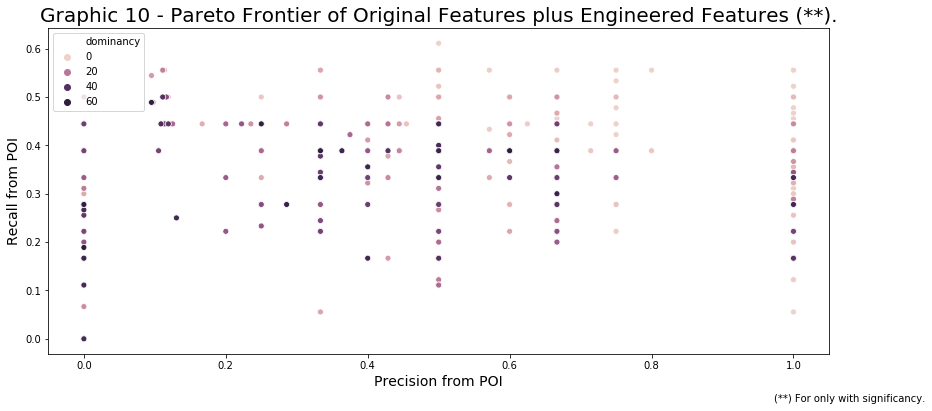

In [745]:
# Plotting the Pareto frontier.
plot_pareto(df = df_metrics_complete, title = "Graphic 10 - Pareto Frontier of Original Features plus Engineered Features (**).",
            x_label = 'Precision from POI', y_label = 'Recall from POI',
            var_1 = 'precision_poi', var_2 = 'recall_poi', hue = 'dominancy',
            footnote = '(**) For only with significancy.')

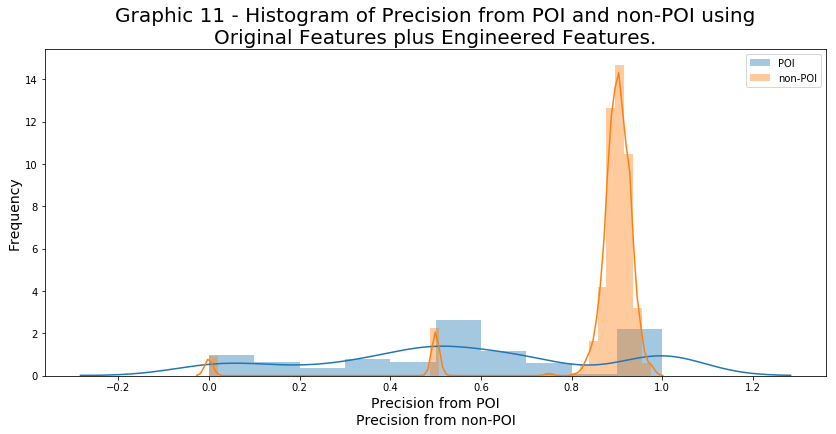

In [746]:
# Plotting the Precision's Histogram.
plot_histogram(df = df_metrics_complete,
               title = 'Graphic 11 - Histogram of Precision from POI and non-POI using\nOriginal Features plus Engineered Features.',
               x_label = 'Precision from POI\nPrecision from non-POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'precision_non_poi')

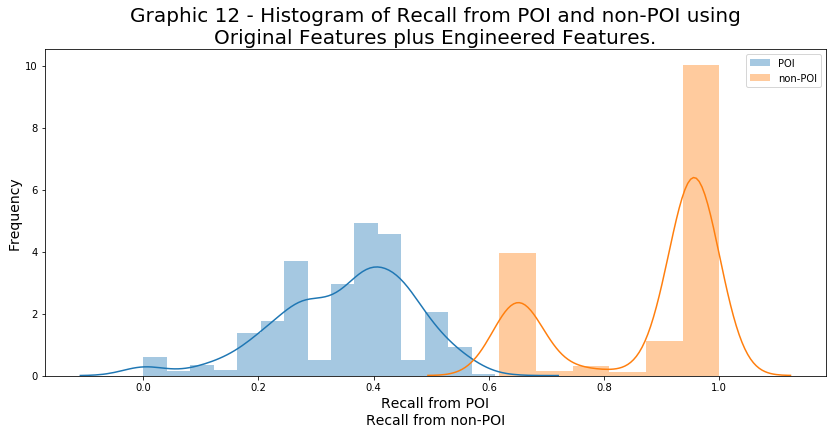

In [747]:
# Plotting the Recall's Histogram.
plot_histogram(df = df_metrics_complete,
               title = 'Graphic 12 - Histogram of Recall from POI and non-POI using\nOriginal Features plus Engineered Features.',
               x_label = 'Recall from POI\nRecall from non-POI', y_label = 'Frequency',
               var_1 = 'recall_poi', var_2 = 'recall_non_poi')

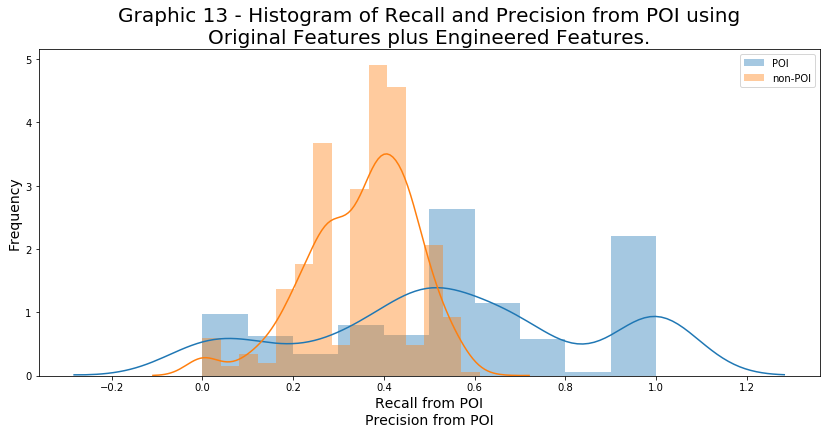

In [748]:
# Comparison Histogram of Recall and Precision.
plot_histogram(df = df_metrics_complete,
               title = 'Graphic 13 - Histogram of Recall and Precision from POI using\nOriginal Features plus Engineered Features.',
               x_label = 'Recall from POI\nPrecision from POI', y_label = 'Frequency',
               var_1 = 'precision_poi', var_2 = 'recall_poi')

Filtering the solution to show the chromosomes with `precision_poi` and `recall_poi` greater than 0.5.

In [753]:
# Filtering solutions.
df_metrics_complete.iloc[:,:7].query('precision_non_poi >= 0.3')\
                              .query('precision_poi >= 0.5')\
                              .query('recall_non_poi >= 0.3')\
                              .query('recall_poi >= 0.5')\
                              .query('dominancy <= 2')\
                              .sort_values(['recall_poi', 'precision_poi'], ascending = False)

,accuracy,precision_non_poi,precision_poi,recall_non_poi,recall_poi,qty_features,dominancy
363,0.737589,0.888889,0.500000,0.756098,0.611111,7,1
168,0.652174,0.888889,1.000000,0.666667,0.555556,4,1
982,0.617330,0.930233,1.000000,0.626016,0.555556,5,1
83,0.736972,0.928571,0.750000,0.764024,0.555556,6,1
409,0.638452,0.906977,0.666667,0.650407,0.555556,5,2
41,0.644002,0.904762,0.500000,0.658130,0.555556,5,2
827,0.631514,0.951220,0.800000,0.642073,0.555556,5,1
403,0.630435,0.948718,0.571429,0.641667,0.555556,8,2
954,0.687855,0.948718,0.750000,0.709177,0.533333,5,1
633,0.628596,0.926829,1.000000,0.641026,0.522222,5,1


Now, let's compare the features selected.

In [766]:
# Solutions with the lowest number of features.
complete_final = pop_complete.loc[:,[363, 168, 982, 83, 409, 41, 827, 403, 954, 633, 254, 368, 5, 221, 490]]

# Adding index to be more understandable.
complete_final.index = features_significant_complete[1:]

# Printing.
complete_final

,363,168,982,83,409,41,827,403,954,633,254,368,5,221,490
exercised_stock_options,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0
total_stock_value,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1
bonus,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
salary,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
deferred_income,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
long_term_incentive,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
restricted_stock,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
total_payments,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shared_receipt_with_poi,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
loan_advances,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


The solution seems to be in consonance with the `features_significant_original`, many candidates also has `deferred_income` and `loan_advances`, but there are more candidate with `total_stock_value`.

So, I have picked the chromosome 633:

* Accuracy: 0.628596
* Precision non-POI: 0.926829	
* Precision POI: 1.000000	
* Recall non-POI: 0.641026
* Recall POI: 0.522222
* Quantity of features: 5

The main reason to select this candidate is due to the similarities with the chromosome 14 from `features_significant_original`. The choosen solution has `exercised_stock_options`, `deferred_income`, `loan_advances`, `ratio_to_from`, and `ratio_to_poi`.

Comparing the results from the output of `SelectKBest`.

In [ ]:
# Subsetting and joining data to create a comparison.
complete_nsga2_selectkbest = feat_sel_results_complete.query('p_values < 0.05')
complete_nsga2_selectkbest.index = complete_nsga2_selectkbest.feature.tolist()
complete_nsga2_selectkbest = complete_nsga2_selectkbest.drop(columns = ['feature','hue'])
complete_nsga2_selectkbest.join(complete_final.loc[:,[633]])

This solution selected also using the NSGA2 algorithm do not have much in common If I haved selected the features with highest p-value from the `SelectKBest`.

### 3.4.4. Creating the list of Variable from Chromosomes

The difference between the results using the `features_significant_original` and `features_significant_complete` was shown bellow.

In [767]:
# Printing the variables selected from each solution.
complete_final.loc[:,[633]].join(original_final.loc[:,[14]])

,633,14
exercised_stock_options,1,1.0
total_stock_value,0,0.0
bonus,0,0.0
salary,0,0.0
deferred_income,1,1.0
long_term_incentive,0,0.0
restricted_stock,0,0.0
total_payments,0,0.0
shared_receipt_with_poi,0,0.0
loan_advances,1,1.0


Creating lists to be used in the report as input.

In [768]:
# Function to extract the features based on the chromosome.
def select_chromosome(df, chromosome_id, feat_list):
    """
    
    """
    # Subsetting the results from features_significant_original
    chromosome_select = df.loc[:,chromosome_id].tolist()

    # Converting 0/1 to False/True
    chromosome_select = map(lambda x : bool(x), chromosome_select)

    # Subsetting to DataFrame. Removing the first element ('poi').
    chromosome_select = pd.DataFrame(feat_list[1:], columns = ['features']).iloc[chromosome_select]

    # Converting to list.
    chromosome_select = chromosome_select.features.tolist()

    # Adding 'poi'
    chromosome_select = ['poi'] + chromosome_select
    
    return chromosome_select

Let's create the lists of features from these two candidates.

In [771]:
# Creating the list of features using the chormosome 14.
chromosome_14 = select_chromosome(original_final, 14, features_significant_original)

chromosome_14

['poi', 'exercised_stock_options', 'deferred_income', 'loan_advances']

In [772]:
# Creating the list of features using the chormosome 633.
chromosome_633 = select_chromosome(complete_final, 633, features_significant_complete)

chromosome_633

['poi',
 'exercised_stock_options',
 'deferred_income',
 'loan_advances',
 'ratio_to_from',
 'ratio_to_poi']

### 3.4.5. Sensible Analysis

In this item I have compared the chromosomes 14 and 633, and I have also compared the `features_significant_original` and `features_significant_complete` set of features.

The comparison was based on the bootstrapping of 15,000 samples of each set of features, for do so I have used the module [Stratified Shuffle Split][scikit_learn_sss], this module preserve the ratio of sample for each class.

[scikit_learn_sss]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

##### Simulations Settings

* Regular Naïve Bayes (without any parameter);
* 500 samples to create the `data_sample`, each sample is a mean of the Stratified Shuffle Split (is a merge of StratifiedKFold and ShuffleSplit) output;
* I have sampled 500 observations from `data_sample` and calculate the `mean()`, this step will be repeated 15,000 times;
* Plot several histogram to see the distribution;
* Draw conclusions.

In [951]:
# Function to create data_sample.
def bootstrap_sample(module, feat, lab, n_sample, n_splits, classifier,
                     random_state = None, test_size = 0.25, parameters = parameters):
    """
    """
    # Temporaly variable to store the metrics.
    data_sample = []

    # Creating a data sample.
    for i in range(0, n_sample):
        
        # Calculating the metrics: Accuracy, recall, and precision.
        data_sample.append(fit_evaluation(module = module,
                                          feat = feat, lab = lab,
                                          n_splits = n_splits,
                                          classifier = classifier,
                                          random_state = random_state,
                                          test_size = test_size))

    # Unzipping the list.
    df_sample = zip(*data_sample)

    # Converting df_sample to DataFrame.
    df_sample = pd.DataFrame(df_sample,
                             index = ['accuracy',
                                      'recall_non_poi',
                                      'recall_poi',
                                      'precision_non_poi',
                                      'precision_poi']).T
    
    # Returning a DataFrame.
    return df_sample

Based on the function used to create the `data_sample`, the bootstrap could be performed.

In [1043]:
# Bootstrapping.
def bootstrapping(df, m_sample, n_sample):
    """
    """
    # Time elapse
    import time
    
    # Track the begining.
    t_start = time.time()
    
    # List to store the results.
    bt_result = []

    # Loop to calculate the average of n_samples.
    for index in range(m_sample):
        
        # Calculating mean from several metrics.
        acc = df.sample(n_sample, replace = True).accuracy.mean()
        rec_poi = df.sample(n_sample, replace = True).recall_poi.mean()
        rec_non_poi = df.sample(n_sample, replace = True).recall_non_poi.mean()
        prec_poi = df.sample(n_sample, replace = True).precision_poi.mean()
        prec_non_poi = df.sample(n_sample, replace = True).precision_non_poi.mean()
        
        # Appending the averages in the list.
        bt_result.append(np.array([acc, rec_poi, rec_non_poi, prec_poi, prec_non_poi]))

    # Converting bt_result in DataFrame.
    bt_result = pd.DataFrame(bt_result,
                             columns = ['accuracy',
                                        'recall_non_poi',
                                        'recall_poi',
                                        'precision_non_poi',
                                        'precision_poi'])
    
    # Track the end.
    t_end = time.time()
    
    print "Bootstrapping Duration:", t_end - t_start, "minutes."
    print float(t_end - t_start)/60.0
    
    # Returning DataFrame.
    return bt_result

#### 3.4.5.1. Bootstrapping the Original Features.

Let's recall the features from `features_significant_original`.

In [998]:
features_significant_original

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'bonus',
 'salary',
 'deferred_income',
 'long_term_incentive',
 'restricted_stock',
 'total_payments',
 'shared_receipt_with_poi',
 'loan_advances',
 'expenses',
 'from_poi_to_this_person',
 'other']

In [999]:
# Reproducibility
np.random.seed(42)

# Creating the dataset of features and the vector of lables.
lab_original, feat_original = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = features_significant_original)

# Calculating the sample data.
df_sample = bootstrap_sample(module = 'sss',
                             feat = feat_original, lab = lab_original,
                             n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_original = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

Bootstrapping Duration: 0.63 minutes.


To make the comparison and analysis easier, I have created a function to plot several histogram in a single graphic.

In [1000]:
# Create a Histogram Matrix Graphic.
def plot_hist_matrix(df, title = '', legend = '', list_subtitle = ['Accuracy',
                                                                   'Recall non-POI',
                                                                   'Recall POI',
                                                                   'Precision non-POI',
                                                                   'Precision POI']):
    """
    """
    # Creating subplots.
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize = [14, 12])

    ax1 = axs[2, 0] # accuracy
    ax2 = axs[1, 1] # recall_non_poi
    ax3 = axs[0, 1] # recall_poi
    ax4 = axs[1, 0] # precision_non_poi
    ax5 = axs[0, 0] # precision_poi

    # Configuration: Vertical Space between subplots.
    plt.subplots_adjust(hspace = 0.2)

    # List of subplots to be used in for loop.
    list_ax = [ax1, ax2, ax3, ax4, ax5]
    
    # Loop to plot each histogram once a time.
    for i in range(0, df.shape[1]):
        sns.distplot(np.array(df.iloc[:,i]), ax = list_ax[i])
        list_ax[i].set_title(list_subtitle[i])
        list_ax[i].legend(legend)
        list_ax[i].axvline(x = np.array(df.iloc[:,i].mean()), color = 'r', linestyle = 'dashed')
    
    # Adding Title for the entire matrix of histogram.
    fig.suptitle(title, fontsize = 20);
    
    # Show.
    plt.show()
    
    return None

Let's plot the values obtained from the bootstrapping the `features_significant_original`.

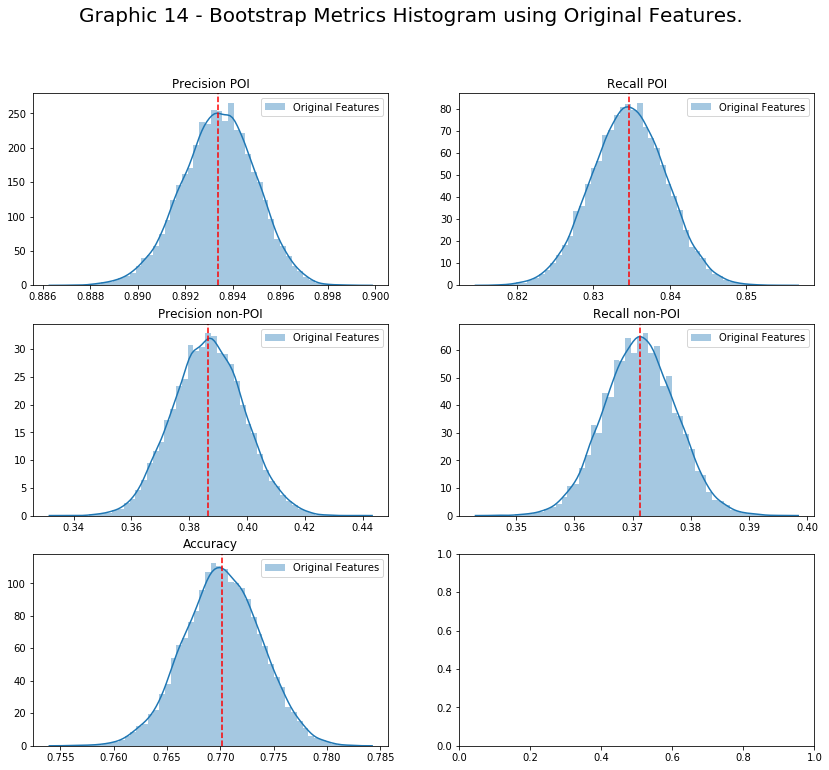

In [1001]:
# Plotting a matrix of histogram.
plot_hist_matrix(df = df_bt_original,
                 title = 'Graphic 14 - Bootstrap Metrics Histogram using Original Features.',
                 legend = ['Original Features'])

The values observed using all features with significancy (`features_significant_original`) are the baseline for further analysis. Table 1 shows the values.


<strong><center>Table 1 - Metrics obtained from Bootstrapping the Original Features.</center></strong>

|Metric|Type|Original|
|:-:|:-:|:-:|
|Precision|POI|38.68%|
|Precision|non-POI|89.34%|
|Recall|POI|37.12%|
|Recall|non-POI|83.45%|
|Accuracy|-|77.02%|

In [1002]:
# Printing the values fo confirm the table 1.
print "Precision POI:", round(df_bt_original.precision_poi.mean(), 4)
print "Precision non-POI:", round(df_bt_original.precision_non_poi.mean(), 4)
print "Recall POI:", round(df_bt_original.recall_poi.mean(), 4)
print "Recall non-POI:", round(df_bt_original.recall_non_poi.mean(), 4)
print "Accuracy:", round(df_bt_original.accuracy.mean(), 4)

Precision POI: 0.8934
Precision non-POI: 0.3866
Recall POI: 0.8347
Recall non-POI: 0.3712
Accuracy: 0.7702


Creating a function to store the results.

In [1003]:
# Record results.
def record_results(df, col_name):
    """
    """
    # Temporaly list to store the variables.
    df_results_temp = []

    # Loop to calculate the mean of all metrics.
    df_results_temp.append(np.array([df.precision_poi.mean(),\
                                     df.precision_non_poi.mean(),\
                                     df.recall_poi.mean(),\
                                     df.recall_non_poi.mean(),\
                                     df.accuracy.mean()] ))
    
    # Converting the list in pandas DataFrame. Adding col name and index name.
    df_results_temp = pd.DataFrame(df_results_temp,
                                   index = [col_name], 
                                   columns = ['Precision POI', 'Precision non-POI',
                                              'Recall POI', 'Recall non-POI',
                                              'Accuracy']).T
    
    # Returning.
    return df_results_temp

In [1004]:
df_results = record_results(df_bt_original, 'Original')

#### 3.4.5.2. Bootstrapping the Complete Features.

Let's recall `features_significant_complete`.

In [1005]:
features_significant_complete

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'bonus',
 'salary',
 'deferred_income',
 'long_term_incentive',
 'restricted_stock',
 'total_payments',
 'shared_receipt_with_poi',
 'loan_advances',
 'expenses',
 'ratio_from_poi_share',
 'ratio_to_from',
 'from_poi_to_this_person',
 'ratio_from_poi',
 'other',
 'ratio_to_poi']

I have made the same procedure for Original Features.

In [1006]:
# Creating the dataset of features and the vector of lables.
lab_complete, feat_complete = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = features_significant_complete)

# Calculating the sample data.
df_sample = bootstrap_sample(module = 'sss',
                             feat = feat_complete, lab = lab_complete,
                             n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_complete = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

Bootstrapping Duration: 0.67 minutes.


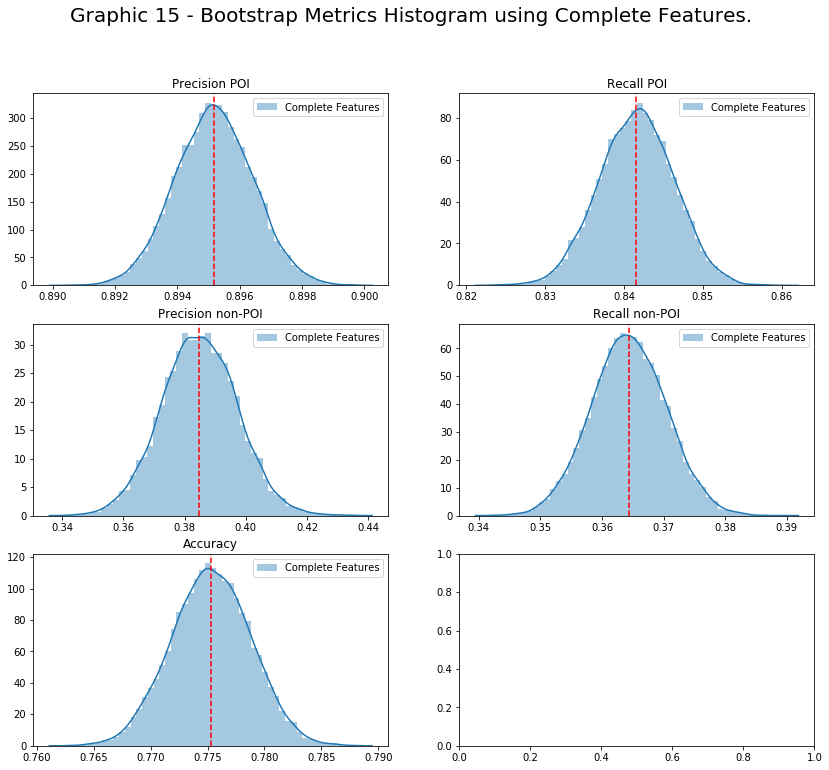

In [1007]:
# Plotting a Matrix of Histograms.
plot_hist_matrix(df = df_bt_complete,
                 title = 'Graphic 15 - Bootstrap Metrics Histogram using Complete Features.',
                 legend = ['Complete Features'])

As you can see, the graphics are very similars, also the results of precision, recall, and accuracy.

<strong><center>Table 2 - Metrics obtained from Bootstrapping the Complete Features.</center></strong>

|Metric|Type|Original|Complete|
|:-:|:-:|:-:|:-:|
|Precision|POI|38.68%|38.48%|
|Precision|non-POI|89.34%|89.52%|
|Recall|POI|37.12%|36.44%|
|Recall|non-POI|83.45%|84.17%|
|Accuracy|-|77.02%|77.53%|

In [1008]:
# Printing the values fo confirm the table 2.
df_results = df_results.join(record_results(df_bt_complete, 'Complete'))

df_results

,Original,Complete
Precision POI,0.893396,0.895178
Precision non-POI,0.386618,0.384853
Recall POI,0.834653,0.841598
Recall non-POI,0.371235,0.364361
Accuracy,0.770196,0.775317


Although the values are quite similar, I must use the A/B Testing to ensure the study. For this reason, I have coded the function `plot_diff_hist_matrix` to plot the differences and the normal distribution to compare it.

In [1009]:
# Create a Histogram Matrix Graphic.
def plot_diff_hist_matrix(df_1, df_2, title = '', legend = (['Difference','Normal']),
                          list_subtitle = ['Accuracy', 'Recall non-POI', 'Recall POI', 'Precision non-POI', 'Precision POI']):
    """
    """
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize = [14, 12])

    ax1 = axs[2, 0] # accuracy
    ax2 = axs[1, 1] # recall_non_poi
    ax3 = axs[0, 1] # recall_poi
    ax4 = axs[1, 0] # precision_non_poi
    ax5 = axs[0, 0] # precision_poi

    plt.subplots_adjust(hspace = 0.2)

    list_ax = [ax1, ax2, ax3, ax4, ax5]
    
    for i in range(0, df_1.shape[1]):
        sns.distplot( np.array(df_1.iloc[:,i] ) - np.array(df_2.iloc[:,i] ), ax = list_ax[i])
        list_ax[i].set_title(list_subtitle[i])

        
        diff = np.array(df_1.iloc[:,i] ) - np.array(df_2.iloc[:,i])
                                            
        null_hyp = np.random.normal(0, np.std(diff) , 10000)
        
        sns.distplot(null_hyp, ax = list_ax[i])
        list_ax[i].legend(legend)
        list_ax[i].axvline(x = (np.array(df_1.iloc[:,i] ) - np.array(df_2.iloc[:,i])).mean(),
                           color = 'r',
                           linestyle = 'dashed')    
    
    fig.suptitle(title, fontsize = 20);
    
    plt.show()
    
    return None

Now, let's use the `features_significant_original` and `features_significant_complete`.

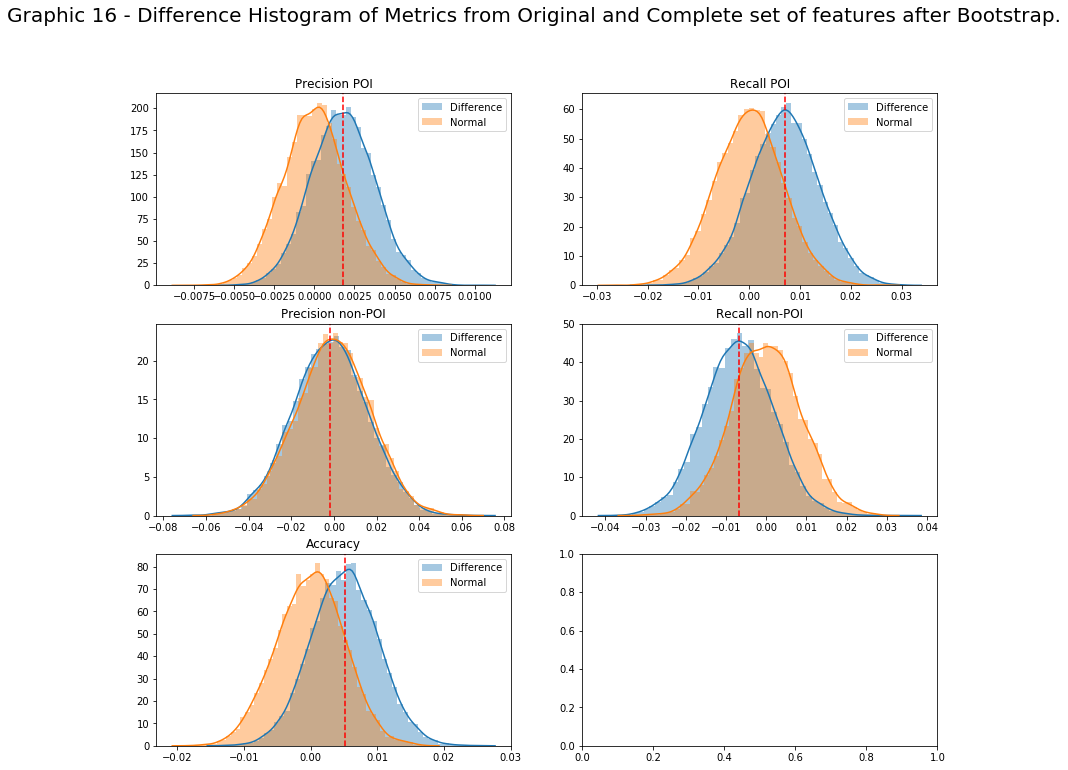

In [1010]:
plot_diff_hist_matrix(df_1 = df_bt_complete, df_2 = df_bt_original,
                      title = 'Graphic 16 - Difference Histogram of Metrics from Original and Complete set of features after Bootstrap.')

I want to prove the `features_significant_complete` has better performance than the `features_significant_original`.

* Null Hypothesis: The `features_significant_original` has better or equal performance than the `features_significant_complete`.
* Alternative Hypothesis: The `features_significant_complete` is better than the `features_significant_original`.

Converting these statments in Hypoteses Testing:

$$H_0: p_{complete} - p_{original} \leq 0 $$
$$H_1: p_{complete} - p_{original} > 0 \tag{1}$$

Where:

* $p$ could be any features of interest (accuracy, recall non-poi, recall poi, precision non-poi, and precision poi).

The function `ab_testing` performs a straightforward hypothetical test for the given feature.

In [1011]:
# Function to calculate the p-value for the given feature.
def ab_testing(df_1, df_2, feat, alpha = 0.05, n = 10000, show_graph = False):
    """
    H0: df_1 - df_2 <= 0
    H1: df_1 - df_2 > 0
    """
    print "Feature:", feat
    print "-------"
    
    df_diff = df_1 - df_2

    h0 = np.random.normal(0, np.std(df_diff[feat]), 10000)
    
    p_value = (h0 > df_diff[feat].mean()).mean()
    
    if show_graph:
        sns.distplot(h0)
        plt.axvline(x = df_diff[feat].mean() , color = 'r', linestyle = 'dashed')
    
    if p_value >= alpha:
        print "Fail to reject the H0"
        
    else:
        print "Reject the H0"
    
    print "p-value:", p_value
    print "alpha:", alpha
    print "\n"
    
    return None    

Now, let's use it.

In [1012]:
# Running the A/B Testing for all features.
for i in df_bt_complete.columns:
    ab_testing(df_bt_complete, df_bt_original, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 0.1531
alpha: 0.05


Feature: recall_non_poi
-------
Fail to reject the H0
p-value: 0.7879
alpha: 0.05


Feature: recall_poi
-------
Fail to reject the H0
p-value: 0.1545
alpha: 0.05


Feature: precision_non_poi
-------
Fail to reject the H0
p-value: 0.5505
alpha: 0.05


Feature: precision_poi
-------
Fail to reject the H0
p-value: 0.1903
alpha: 0.05




All tests have failed to reject the null hypothesis, which means I do not have statistical evidency to affirm the `features_significant_complete` has better performance than `features_significant_original`.

#### 3.4.5.3. Selected Features from NSGA2 only Original Features

Let's recall chromosome 14.

In [1013]:
# Features selected after NSGA2 using only original features (without any engineered feature).
chromosome_14

['poi', 'exercised_stock_options', 'deferred_income', 'loan_advances']

Following the same specifications of the other simulations.

In [1014]:
# Creating the dataset of features and the vector of lables.
lab_14, feat_14 = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = chromosome_14)

# Calculating the sample data.
df_sample = bootstrap_sample(module = 'sss',
                             feat = feat_14, lab = lab_14,
                             n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_14 = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

Bootstrapping Duration: 0.7 minutes.


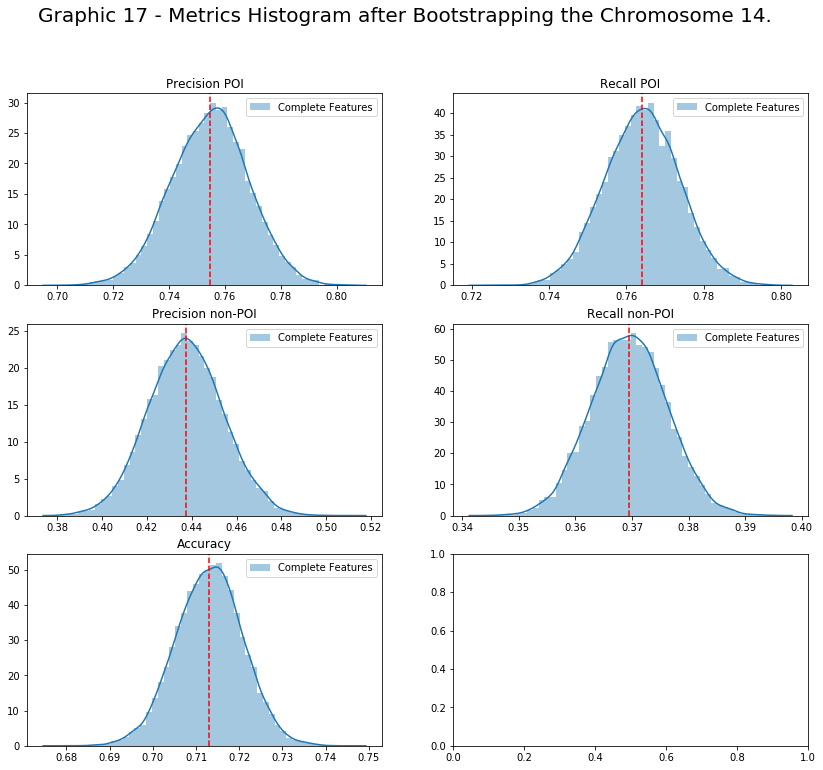

In [1015]:
# Plotting the Matrix of Histogram.
plot_hist_matrix(df = df_bt_14,
                 title = 'Graphic 17 - Metrics Histogram after Bootstrapping the Chromosome 14.',
                 legend = ['Complete Features'])

I have noticed a clearly improvement in `precision_poi` and `recall_poi`, on the other hand the `precision_non_poi` and `recall_non_poi` have dropped. There are a trade-off between these metrics and I hope after tuning the classifier I could reach better results.

<strong><center>Table 4 - Metrics obtained from Bootstrapping the Chromosome 14.</center></strong>

|Metric|Type|Original|Complete|Chromosome 14|
|:-:|:-:|:-:|:-:|:-:|
|Precision|POI|38.68%|38.48%|41.49%|
|Precision|non-POI|89.34%|89.52%|76.05%|
|Recall|POI|37.12%|36.44%|38.24%|
|Recall|non-POI|83.45%|84.17%|74.73%|
|Accuracy|-|77.02%|77.53%|70.02%|

In [1016]:
# Printing the values fo confirm the table 3.
df_results = df_results.join(record_results(df_bt_14, 'Chromosome 14'))

df_results

,Original,Complete,Chromosome 14
Precision POI,0.893396,0.895178,0.754686
Precision non-POI,0.386618,0.384853,0.437442
Recall POI,0.834653,0.841598,0.764019
Recall non-POI,0.371235,0.364361,0.369520
Accuracy,0.770196,0.775317,0.713082


I want to compare the results of `chromosome_14` and the `features_significant_original`.

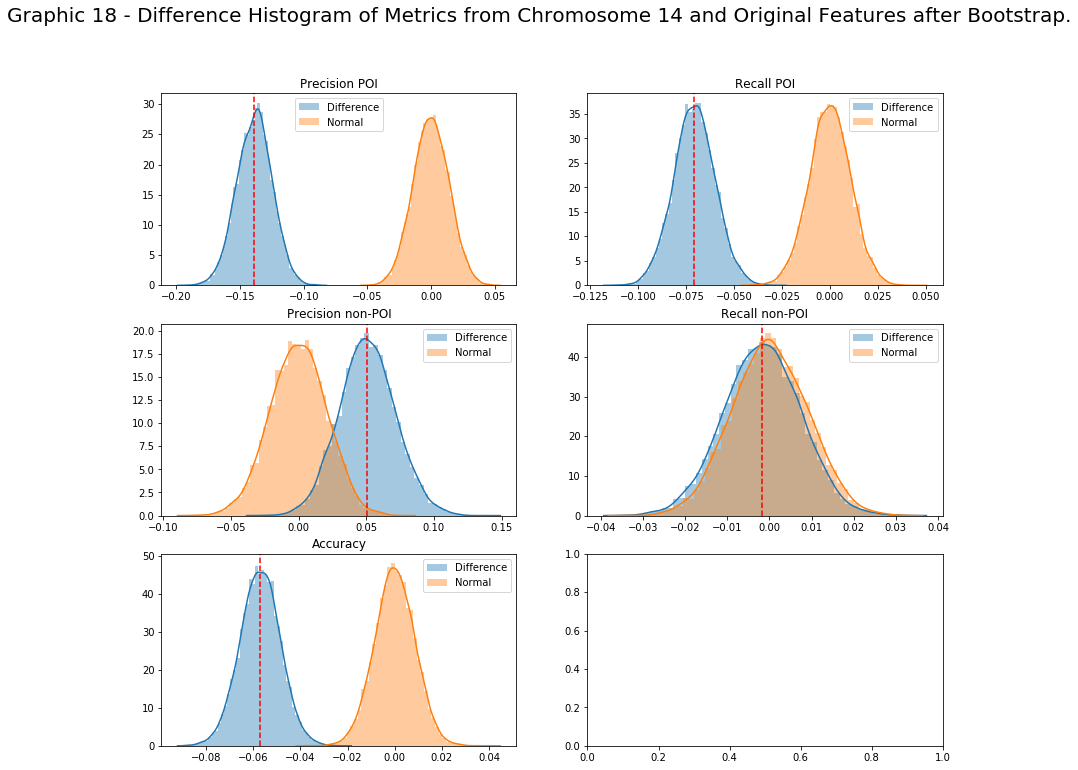

In [1017]:
# Plotting histogram of difference.
plot_diff_hist_matrix(df_bt_14, df_bt_original,
                      title = 'Graphic 18 - Difference Histogram of Metrics from Chromosome 14 and Original Features after Bootstrap.')

Performing the A/B testing to analyze the statistical significancy.

In [1018]:
# Testing all metrics. 
for i in df_bt_complete.columns:
    ab_testing(df_bt_14, df_bt_original, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: recall_non_poi
-------
Fail to reject the H0
p-value: 0.568
alpha: 0.05


Feature: recall_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: precision_non_poi
-------
Reject the H0
p-value: 0.0073
alpha: 0.05


Feature: precision_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05




There are no statitical evidence of any features from `chromosome_14` has better performance than the set of features defined in the list `features_significant_original`.

#### 3.4.5.4. Selected Features from NSGA2 also using the Engineered Features.

Let's recall `chromosome_633`.

In [1019]:
# Features selected after NSGA2 using only original features AND engineered features.
chromosome_633

['poi',
 'exercised_stock_options',
 'deferred_income',
 'loan_advances',
 'ratio_to_from',
 'ratio_to_poi']

Bootstrapping it.

In [1020]:
# Creating the dataset of features and the vector of lables.
lab_633, feat_633 = wrapper_featureformatsplit(my_dataset = my_dataset,
                                                         features_list = chromosome_633)

# Calculating the sample data.
df_sample = bootstrap_sample(module = 'sss',
                             feat = feat_633, lab = lab_633,
                             n_sample = 500, n_splits = 3, classifier = 'gauss')

# Bootstrapping.
df_bt_633 = bootstrapping(df = df_sample, m_sample = 15000, n_sample = 500)

Bootstrapping Duration: 0.7 minutes.


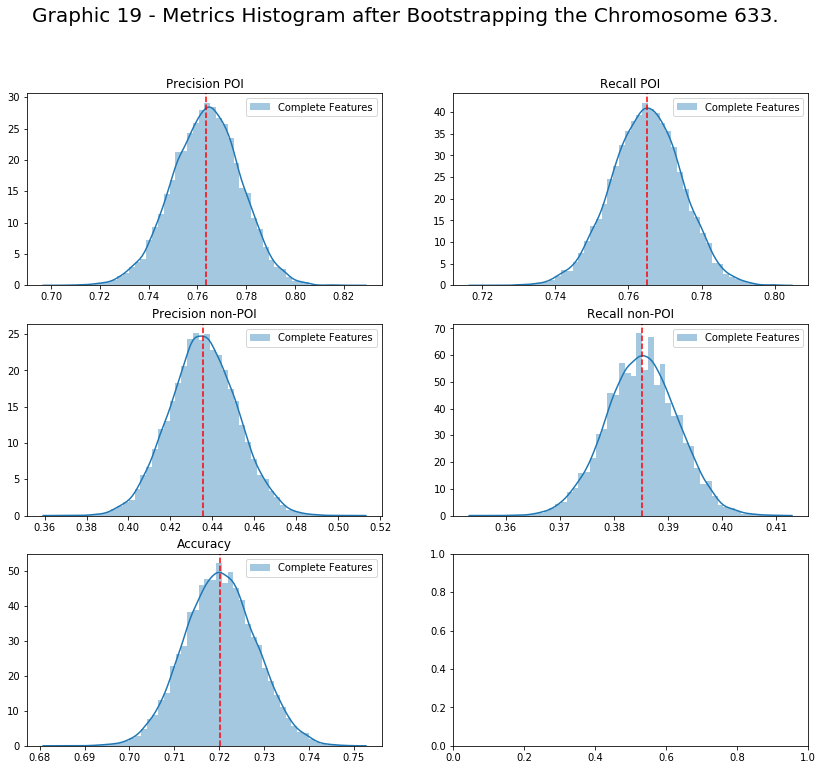

In [1021]:
# Plotting the matrix of histograms.
plot_hist_matrix(df = df_bt_633,
                 title = 'Graphic 19 - Metrics Histogram after Bootstrapping the Chromosome 633.',
                 legend = ['Complete Features'])

This set of features from `chromosome_633` in all aspects has better metrics from the `chromosome_14`. "Seems" the addition of two new features improved the overall performance.

<strong><center>Table 4 - Metrics obtained from Bootstrapping the Chromosome 633.</center></strong>

|Metric|Type|Original|Complete|Chromosome 14|Chromosome 633|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Precision|POI|38.68%|38.48%|41.49%|44.14%|
|Precision|non-POI|89.34%|89.52%|76.05%|76.75%|
|Recall|POI|37.12%|36.44%|38.24%|38.72%|
|Recall|non-POI|83.45%|84.17%|74.73%|75.58%|
|Accuracy|-|77.02%|77.53%|70.02%|71.24%|

In [1022]:
# Printing the values fo confirm the table 3.
df_results = df_results.join(record_results(df_bt_633, 'Chromosome 633'))

df_results

,Original,Complete,Chromosome 14,Chromosome 633
Precision POI,0.893396,0.895178,0.754686,0.763640
Precision non-POI,0.386618,0.384853,0.437442,0.435645
Recall POI,0.834653,0.841598,0.764019,0.764956
Recall non-POI,0.371235,0.364361,0.369520,0.385159
Accuracy,0.770196,0.775317,0.713082,0.720195


I want to compare the results of `chromosome_633` and the `features_significant_complete`.

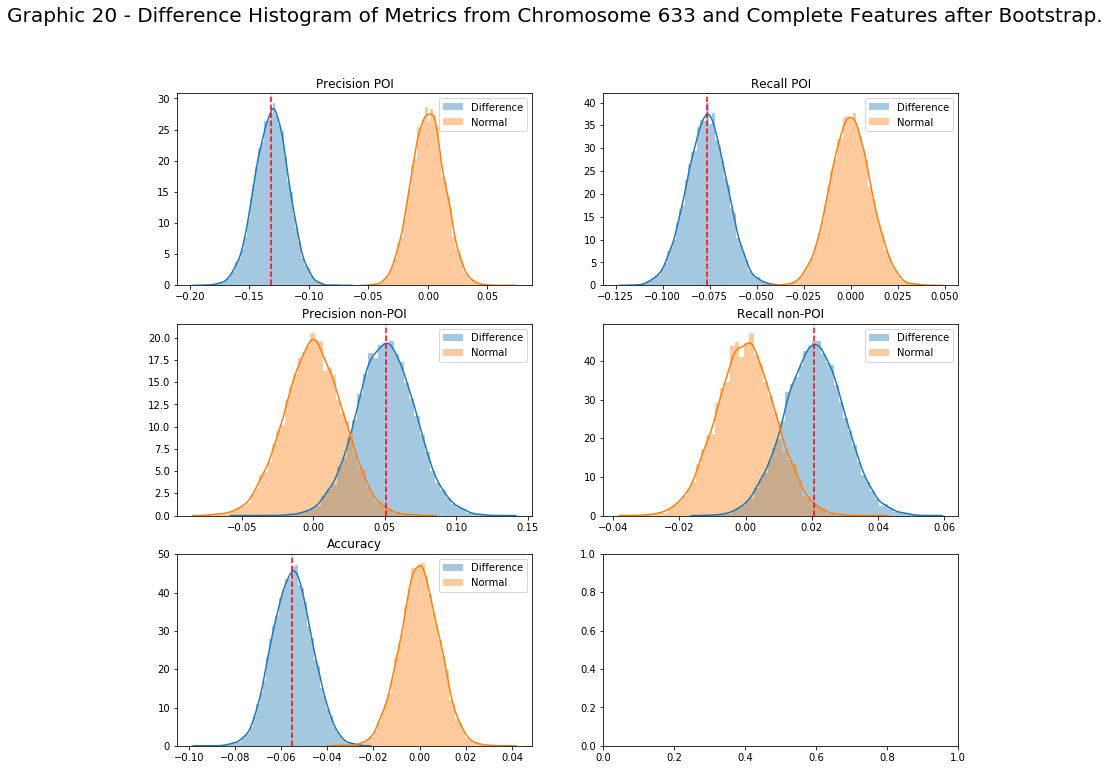

In [1023]:
# Plotting comparison.
plot_diff_hist_matrix(df_1 = df_bt_633,
                      df_2 = df_bt_complete,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

Performing A/B Testing to see statistical significancy.

In [1024]:
# Testing all features.
for i in df_bt_complete.columns:
    ab_testing(df_bt_633, df_bt_complete, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: recall_non_poi
-------
Reject the H0
p-value: 0.0105
alpha: 0.05


Feature: recall_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05


Feature: precision_non_poi
-------
Reject the H0
p-value: 0.007
alpha: 0.05


Feature: precision_poi
-------
Fail to reject the H0
p-value: 1.0
alpha: 0.05




I have found two metrics with statistical evidence that has better performance in the `chromosome_633` over the `features_significant_complete`.

* `recall_poi`, and;
* `precision_poi`.

This is a good indication to investigate the `chromosome_633` using tuned parameters.

As last comparison, I will compare the bootstrap output from `chromosome_14` and `chromosome_633`.

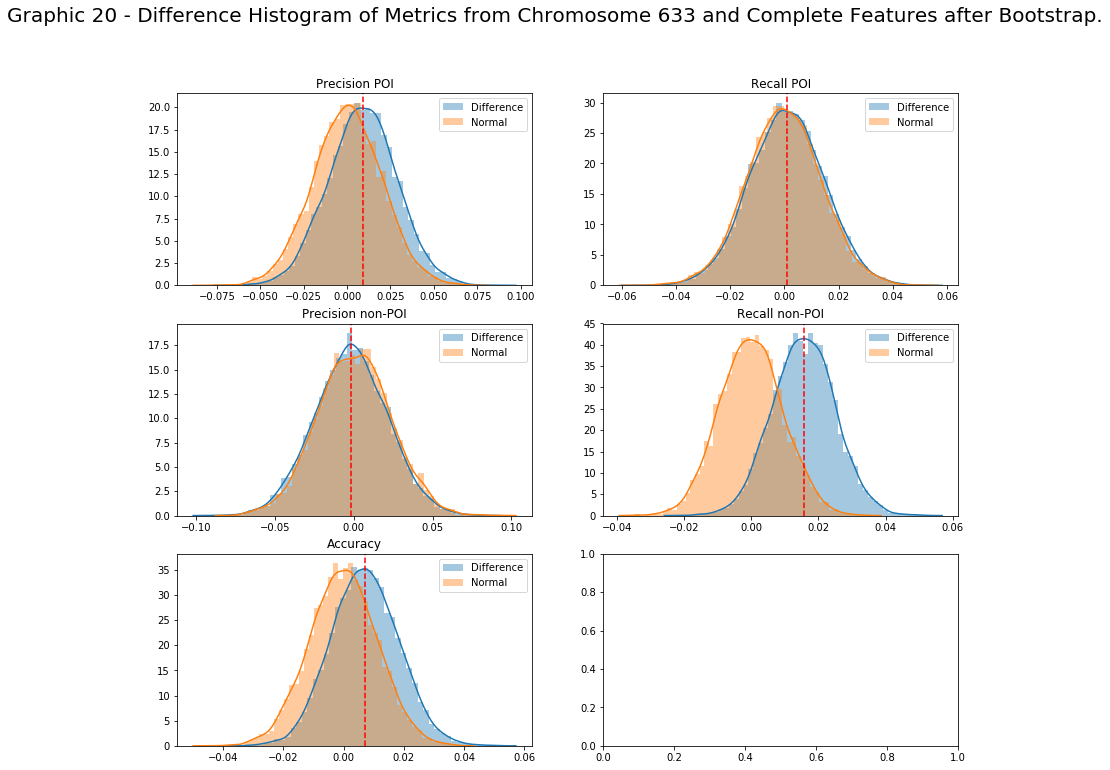

In [1025]:
# Plotting comparison.
plot_diff_hist_matrix(df_bt_633, df_bt_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

Performing the A/B Testing.

In [1026]:
# Running the A/B Testing for all features.
for i in df_bt_complete.columns:
    ab_testing(df_bt_633, df_bt_14, i)

Feature: accuracy
-------
Fail to reject the H0
p-value: 0.2537
alpha: 0.05


Feature: recall_non_poi
-------
Reject the H0
p-value: 0.0459
alpha: 0.05


Feature: recall_poi
-------
Fail to reject the H0
p-value: 0.462
alpha: 0.05


Feature: precision_non_poi
-------
Fail to reject the H0
p-value: 0.5416
alpha: 0.05


Feature: precision_poi
-------
Fail to reject the H0
p-value: 0.3243
alpha: 0.05




There are no feature with statistical evidence in `chromosome_633` that has better performance over the features from `chromosome_14`.

### 3.5. Dimension Reduction <a id='pca'></a>

Due to the few features of this model (3 and 5), I will not use it because I do not see any advantages to reduce the number of features, the trade-off between computational performance and information-loss it is in favor to keep the features as is.


***

# 4. Predicting <a id='ml'></a>

So far I have used the Naïve Bayes (default parameterized) to find an optimized set of features, the next step of this project is to adjust the parameters to find an even better solution.

Take into account the problems faced in the process of selecting the features, I will use here the [KFold module][sk_learn_kfold], because its allow me even using a small dataset of testing to perform a good evaluation of my model.

[sk_learn_kfold]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

## 4.1. Tuning Parameters

In this chapter I will perform the tuning the parameters from several classifiers, due to the so many differents parameters combination and the difficult to create a function to automize it, I have done it manually.

I have used the StratifiedKFold (a better version of KFold) to maintan the ratio, my setup for it: 

* 4 Folds;
* Random State = 42, and;
* Suffle = True.

After tuned the parameters of all classifiers, I will perform a bootstrapping for each classifier to compare.

Creating a dedicated dataset for tuning.

In [233]:
# Creating Datasets to be used in tuning.
lab_tuning, feat_tuning = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = features_significant_original)

# Scaling.
feat_tuning = feat_scale(feat_tuning)

To avoid repetition in the report, I have created a function to bundle some code lines.

In [234]:
# Function to encapsulate some code lines.
def tuning(parameters, classifier, scoring = 'recall', cv = 4, random_state = None):
    """
    """
    # Dictionary of Classifiers and Constructors.
    list_class = {'ada':('ada', AdaBoostClassifier()),
                  'svc':('svc', SVC()),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier()),
                  'rand':('rand', RandomForestClassifier())}
    
    # Creating the Pipeline.
    pipeline = Pipeline([list_class[classifier]])

    # Creating the GridSearch Object.
    clf = GridSearchCV(estimator = pipeline,                  # Pipeline
                       param_grid = parameters,               # Parameters to be tested.
                       cv = StratifiedKFold(n_splits = cv,    # Number of splits.
                                            shuffle = True,   # Shuffle the observations.
                                            random_state = random_state), # Set the random seed.
                            scoring = scoring)                # Metric to evaluate.

    # Fitting.
    clf.fit(feat_tuning, lab_tuning)
    
    # Printing recall results.
    print "Recall:", round(100 * clf.cv_results_['mean_test_score'].max(), 2), "%"
    
    # Return the classifier.
    return clf

Sadly, I have not find an easy way to implement an heuristic to guide me to find good values of parameters (I got traumatized coding an Genetic Algorithm for this reason I have performed it manually), for this reason I adopt this concepts to drive through the optimized parameters.

- Best first search;
- Divide-and-conquer.

#### Best First Search

Generally, the classifiers has a lot of parameters, I defined the follow strategy:

* Start by the Scalar parameters;
    * Integer;
    * Floats;
* Categorical parameters.

I will take the most promissor node for each tree level, it means, I will find the optimized value for parameter_1 and keep all the other constant then I move to the next parameter and repeat the same concept.

[Source][best_first_search]

[best_first_search]: https://en.wikipedia.org/wiki/Best-first_search

#### Divide-and-conquer

To start a model tuning we do not have a clue what is the a value so-called optimized (or close to the global maximum), for this reason the space of solution is the entire set of real or integer number.

As first step I take 2 reasonable values (using intuition or the default values from the Scikit Learn) for each level of the tree (in this case the same of parameter) and calculate the mean.

$$\text{paramater}_1 = [value_1, mean, value_2]$$

After calculating the evaluation metric using these three values, it is possible to determine in which of the two parts the optimized value is much closed. Supose the value_1 is the one with better evaluation metric.

$$\text{paramater}_1 = [value_1, \frac{value_1 + mean}{2},mean]$$

So the cicle restarts, have in mind, there are other situations and this is just a brief explanation.

[Source][divide_and_conquer]

[divide_and_conquer]: https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm

#### Caveat

There are several caveats in this approach one of them is I could fall in a local maximum (mostly because I do not use backtracking).

### 4.1.1. SVM

After several simulation, I have found the follow parameters:

* kernel: poly;
* C: 1550;
* degree: 2;
* gamma: scale, and;
* Recall (mean): 32.66%.

In [841]:
# Defining parameters.
parameters = {'svc__kernel':['poly', 'linear', 'rbf'],
              'svc__C':[10, 1550, 2000],
              'svc__degree':[1, 2, 3],
              'svc__gamma':['scale', 0.01, 0.001]}

# Creating the classifier using the function tuning.
clf = tuning(parameters, 'svc', 'recall', random_state= 42)

# Printing the optimized estimator.
clf.best_estimator_

Recall: 32.66 %


Pipeline(memory=None,
     steps=[('svc', SVC(C=1550, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

### 4.1.2. Naïve Bayes

The Naïve Bayes is the easiest one to calibrate.

* var_smoothing: 0, and;
* Recall (mean): 44.89%.

In [236]:
# Defining parameters.
parameters = {'gauss__var_smoothing': [1e-9, 0, 0.1]}

# Creating classifier and training. Bear in mind, the random state.
clf = tuning(parameters, 'gauss', 'recall', random_state= 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 44.9 %


Pipeline(memory=None,
     steps=[('gauss', GaussianNB(priors=None, var_smoothing=0))])

### 4.1.3. AdaBoost

Optimized parameters:

* n_estimators: 70;
* learning_rate: 1, and;
* Recall (mean): 38.78%.

In [237]:
# Defining parameters.
parameters = {'ada__n_estimators':[60, 70, 100],
              'ada__learning_rate':[1, 0.9, 1.1]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'ada', 'recall', random_state= 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 38.78 %


Pipeline(memory=None,
     steps=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=60, random_state=None))])

### 4.1.4. K-Nearest Neighbors¶

Optimized parameters:

* n_neighbors: 1;
* algorithm: auto;
* leaf_size: 1;
* p: 1, and;
* Recall(mean): 32.66%.

In [238]:
# Defining parameters.
parameters = {'knn__n_neighbors': [1, 2],
              'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__leaf_size':[1, 2],
              'knn__p':[1, 2]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'knn', 'recall', random_state= 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 32.66 %


Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform'))])

### 4.1.5. Decision Tree

Optimized parameters:

* class_weight: 'balanced';
* criterion: 'gini';
* max_leaf_nodes: None;
* min_samples_leaf: 2;
* min_samples_split: 4;
* splitter: 'random';
* max_depth: 6, and;
* Recall (mean): 100%.

In [239]:
# Defining parameters.
parameters = {'tree__class_weight':[None,'balanced'],
              'tree__criterion': ['gini', 'entropy'],
              'tree__max_depth': [5, 6 , 4],
              'tree__splitter':['best', 'random'],
              'tree__max_leaf_nodes':[None, 2, 3, 4],
              'tree__min_samples_leaf':[1, 2, 3],
              'tree__min_samples_split': [2, 3, 4]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'tree', 'recall', random_state= 42)

# Printing optimized estimators.
clf.best_estimator_

Recall: 100.0 %


Pipeline(memory=None,
     steps=[('tree', DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=3,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'))])

### 4.1.6. Random Forest

Optimized parameters:

* class_weight: 'balanced';
* criterion: 'entropy';
* max_leaf_nodes: 2;
* min_samples_leaf: 2;
* min_samples_split: 3;
* max_depth: 6, and;
* Recall (mean): 88.71%.

In [240]:
# Ensure the reproducibility.
np.random.seed(42)

# Defining parameters.
parameters = {'rand__class_weight':[None,'balanced'],
              'rand__criterion': ['gini', 'entropy'],
              'rand__n_estimators':[1, 2],
              'rand__max_depth': [5, 6 , 4],
              'rand__max_leaf_nodes':[None, 2, 3],
              'rand__min_samples_leaf':[2, 3, 4],
              'rand__min_samples_split':[2, 3]}

# Creating classifier and training. Bear in mind, the random state.
clf  = tuning(parameters, 'rand', 'recall')

# Printing optimized estimators.
clf.best_estimator_

Recall: 88.71 %


Pipeline(memory=None,
     steps=[('rand', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

### 4.1.7. Optimized Parameters

Creating a dictionary to store all the optimized parameters because it will be used in the `GridSearchCV`.

In [253]:
# Paramenters.
para_final = {'svc__kernel':['poly'],
              'svc__C':[1550],
              'svc__degree':[2],
              'svc__gamma':['scale'],
              'gauss__var_smoothing': [0],
              'ada__n_estimators':[70],
              'ada__learning_rate':[0.9],
              'knn__n_neighbors': [1],
              'knn__algorithm':['auto'],
              'knn__leaf_size':[1],
              'knn__p':[1],
              'tree__class_weight':['balanced'],
              'tree__criterion': ['gini'],
              'tree__max_depth': [6],
              'tree__splitter':['random'],
              'tree__max_leaf_nodes':[None],
              'tree__min_samples_leaf':[2],
              'tree__min_samples_split': [4],
              'rand__class_weight':['balanced'],
              'rand__criterion': ['entropy'],
              'rand__n_estimators':[2],
              'rand__max_depth': [6],
              'rand__max_leaf_nodes':[2],
              'rand__min_samples_leaf':[2],
              'rand__min_samples_split':[2]}

## 4.2. Evaluating Classifiers

Due to the huge time consuming simulations I have only simulated the `chromosome_14` and `chromosome_633`.

In [1071]:
# Results before tuning the parametes.
df_results.iloc[:,[2,3]]

,Chromosome 14,Chromosome 633
Precision POI,0.754686,0.763640
Precision non-POI,0.437442,0.435645
Recall POI,0.764019,0.764956
Recall non-POI,0.369520,0.385159
Accuracy,0.713082,0.720195


#### Creating Dataset to Evaluation

In [1072]:
# Reproducibility
np.random.seed(42)

# Creating Datasets to be used in tuning.
lab_eval_14, feat_eval_14 = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = chromosome_14)

# Scaling
feat_eval_14 = feat_scale(feat_eval_14)

# Creating Datasets to be used in tuning.
lab_eval_633, feat_eval_633 = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = chromosome_633)

# Scaling
feat_eval_633 = feat_scale(feat_eval_633)

Creating the function to wrap some line codes.

In [1073]:
# Created to eliminate some line of codes.
def evaluation_classifier(feat, lab, classifier, parameters,
                          bt_n_sample = 15000, bt_m_sample = 500, module = 'sss', n_sample = 500, n_splits = 3):
    """
    """
    # Calculating the sample data.
    df = bootstrap_sample(module = module,
                          feat = feat, lab = lab,
                          n_sample = n_sample,
                          n_splits = n_splits,
                          classifier = classifier,
                          parameters = parameters)

    # Bootstraping: Gauss + Optimized Parameters.
    df_bootstrap = bootstrapping(df, bt_n_sample, bt_m_sample)
    
    return df_bootstrap

### 4.2.1. Gauss

In [1074]:
# Evaluating using Gauss + Optimized parameters
df_gauss_14 = evaluation_classifier(feat_eval_14, lab_eval_14, 'gauss', parameters = para_final)
df_gauss_633 = evaluation_classifier(feat_eval_633, lab_eval_633, 'gauss', parameters = para_final)

Bootstrapping Duration: 36.640999794 minutes.
0.6106833299
Bootstrapping Duration: 36.7600002289 minutes.
0.612666670481


In [1075]:
record_results(df_gauss_14, 'Chromosome 14 - Gauss - Optimized').\
join(record_results(df_gauss_633, 'Chromosome 633 - Gauss - Optimized'))

,Chromosome 14 - Gauss - Optimized,Chromosome 633 - Gauss - Optimized
Precision POI,0.748736,0.791858
Precision non-POI,0.421657,0.365658
Recall POI,0.771648,0.786148
Recall non-POI,0.368820,0.359403
Accuracy,0.719747,0.736049


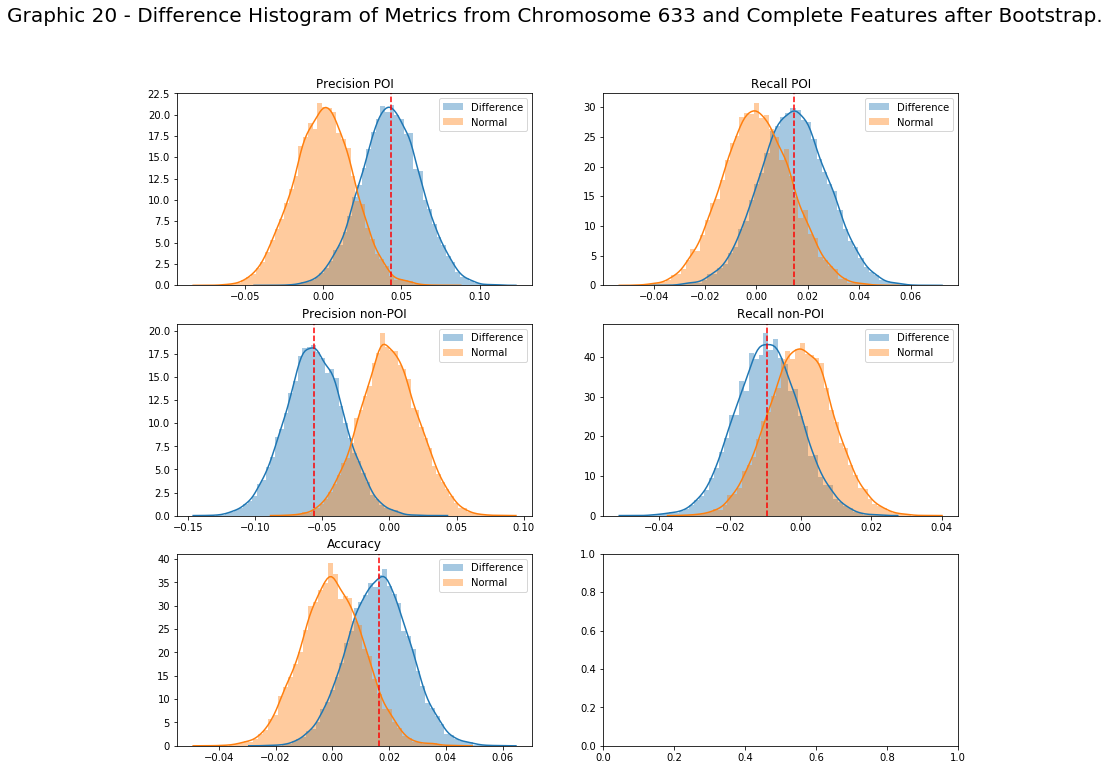

In [1076]:
# Plotting comparison.
plot_diff_hist_matrix(df_gauss_633, df_gauss_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

### 4.2.2. SVM

In [1077]:
# Evaluating using SVM + Optimized parameters
df_svm_14 = evaluation_classifier(feat_eval_14, lab_eval_14, 'svc', parameters = para_final)
df_svm_633 = evaluation_classifier(feat_eval_633, lab_eval_633, 'svc', parameters = para_final)

Bootstrapping Duration: 36.3589999676 minutes.
0.605983332793
Bootstrapping Duration: 36.881000042 minutes.
0.614683334033


In [1078]:
record_results(df_svm_14, 'Chromosome 14 - Gauss - Optimized').\
join(record_results(df_svm_633, 'Chromosome 633 - Gauss - Optimized'))

,Chromosome 14 - Gauss - Optimized,Chromosome 633 - Gauss - Optimized
Precision POI,0.876595,0.882535
Precision non-POI,0.157669,0.022056
Recall POI,0.985137,0.991265
Recall non-POI,0.065224,0.010664
Accuracy,0.866422,0.875903


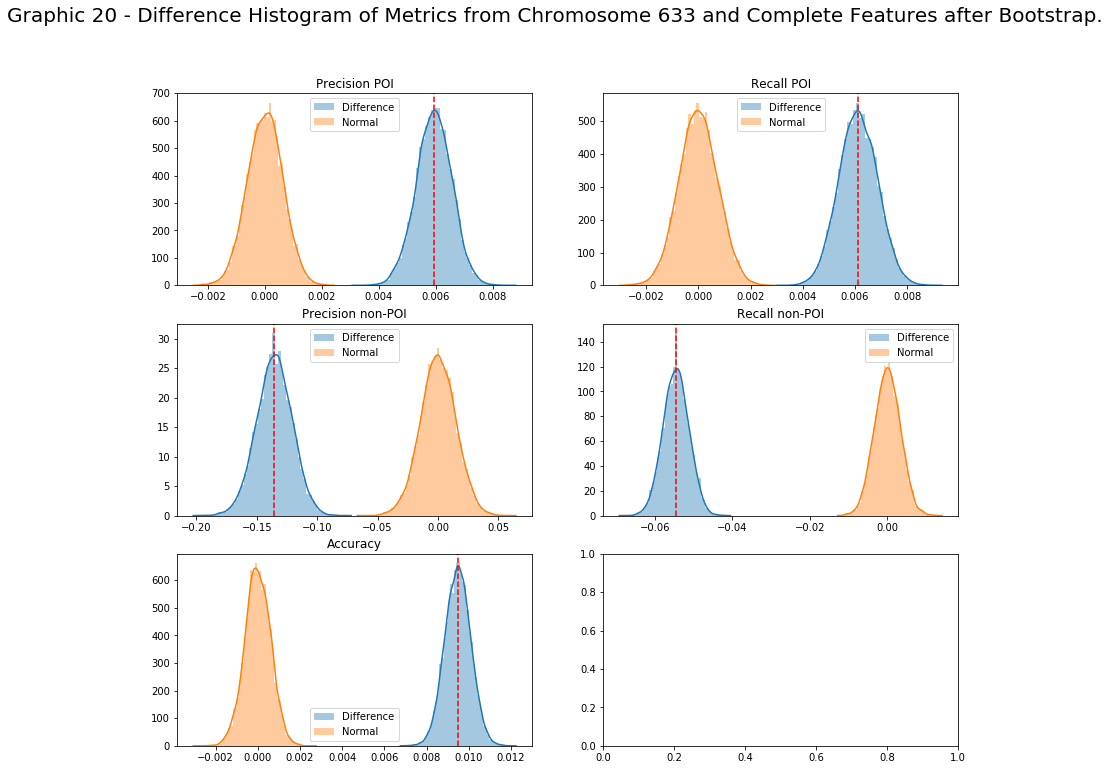

In [1079]:
# Plotting comparison.
plot_diff_hist_matrix(df_svm_633, df_svm_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

### 4.2.3. KNN

In [1080]:
# Evaluating using KNN + Optimized parameters
df_knn_14 = evaluation_classifier(feat_eval_14, lab_eval_14, 'knn', parameters = para_final)
df_knn_633 = evaluation_classifier(feat_eval_633, lab_eval_633, 'knn', parameters = para_final)

Bootstrapping Duration: 36.8120000362 minutes.
0.613533333937
Bootstrapping Duration: 36.7660000324 minutes.
0.612766667207


In [1081]:
record_results(df_knn_14, 'Chromosome 14 - Gauss - Optimized').\
join(record_results(df_knn_633, 'Chromosome 633 - Gauss - Optimized'))

,Chromosome 14 - Gauss - Optimized,Chromosome 633 - Gauss - Optimized
Precision POI,0.874141,0.886675
Precision non-POI,0.131812,0.157024
Recall POI,0.977603,0.984267
Recall non-POI,0.051545,0.053133
Accuracy,0.858115,0.874728


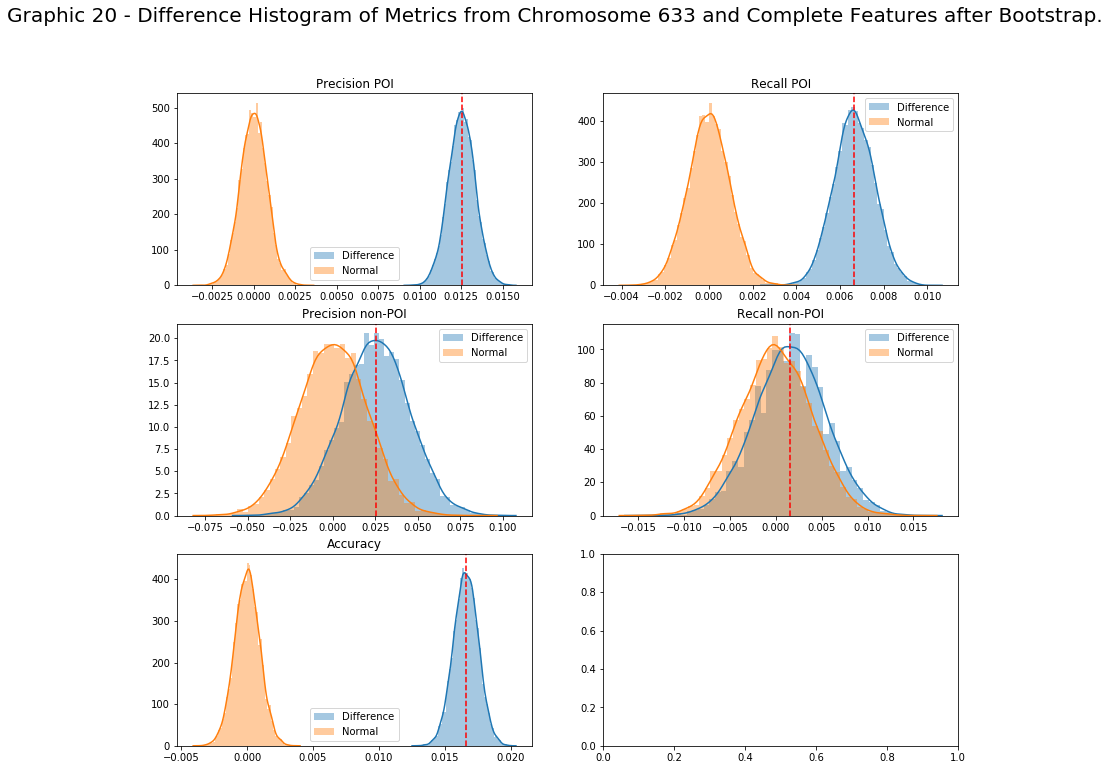

In [1082]:
# Plotting comparison.
plot_diff_hist_matrix(df_knn_633, df_knn_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

### 4.2.4. Decision Tree

In [1083]:
# Evaluating using KNN + Optimized parameters
df_tree_14 = evaluation_classifier(feat_eval_14, lab_eval_14, 'tree', parameters = para_final)
df_tree_633 = evaluation_classifier(feat_eval_633, lab_eval_633, 'tree', parameters = para_final)

Bootstrapping Duration: 36.7039999962 minutes.
0.61173333327
Bootstrapping Duration: 37.125 minutes.
0.61875


In [1084]:
record_results(df_tree_14, 'Chromosome 14 - Gauss - Optimized').\
join(record_results(df_tree_633, 'Chromosome 633 - Gauss - Optimized'))

,Chromosome 14 - Gauss - Optimized,Chromosome 633 - Gauss - Optimized
Precision POI,0.899085,0.917013
Precision non-POI,0.286114,0.356584
Recall POI,0.873422,0.905996
Recall non-POI,0.319951,0.374490
Accuracy,0.802004,0.843488


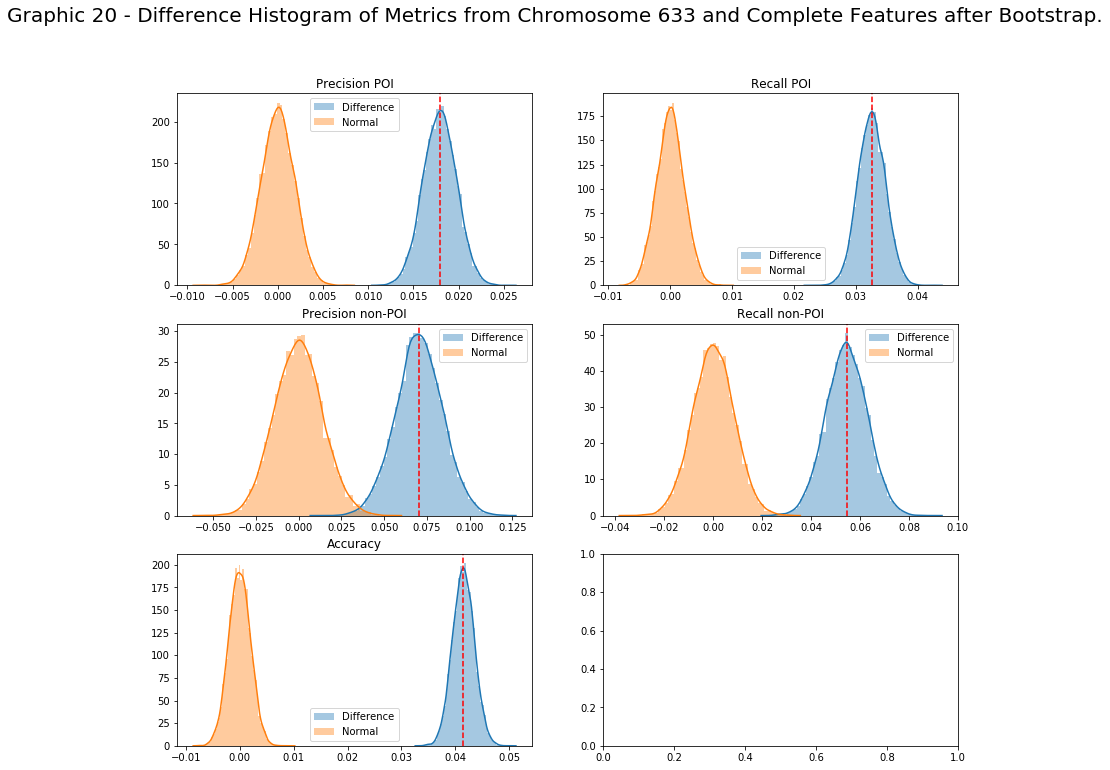

In [1085]:
# Plotting comparison.
plot_diff_hist_matrix(df_tree_633, df_tree_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

### 4.2.5. Random Forest

In [1086]:
# Evaluating using KNN + Optimized parameters
df_rand_14 = evaluation_classifier(feat_eval_14, lab_eval_14, 'rand', parameters = para_final)
df_rand_633 = evaluation_classifier(feat_eval_633, lab_eval_633, 'rand', parameters = para_final)

Bootstrapping Duration: 36.6710000038 minutes.
0.611183333397
Bootstrapping Duration: 36.6859998703 minutes.
0.611433331172


In [1087]:
record_results(df_rand_14, 'Chromosome 14 - Gauss - Optimized').\
join(record_results(df_rand_633, 'Chromosome 633 - Gauss - Optimized'))

,Chromosome 14 - Gauss - Optimized,Chromosome 633 - Gauss - Optimized
Precision POI,0.887762,0.899460
Precision non-POI,0.270842,0.320692
Recall POI,0.922895,0.961430
Recall non-POI,0.207818,0.183283
Accuracy,0.830590,0.869880


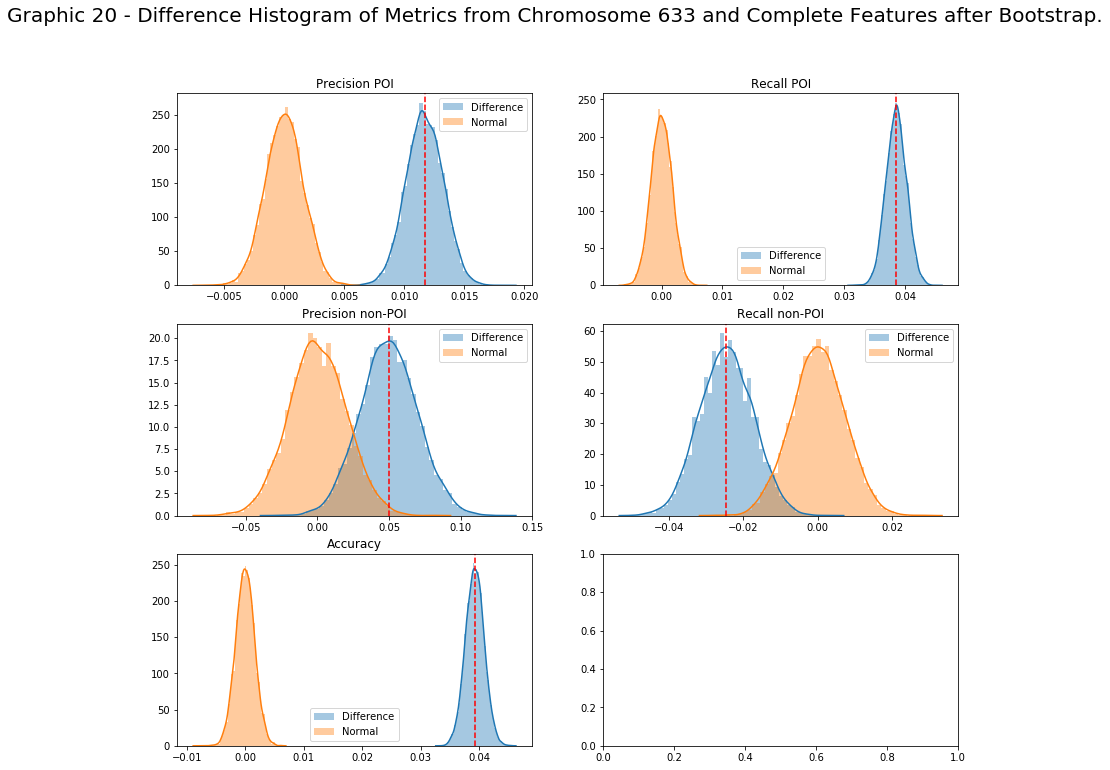

In [1088]:
# Plotting comparison.
plot_diff_hist_matrix(df_rand_633, df_rand_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

### 4.2.5. AdaBoost

In [1089]:
# Evaluating using KNN + Optimized parameters
df_ada_14 = evaluation_classifier(feat_eval_14, lab_eval_14, 'ada', parameters = para_final)
df_ada_633 = evaluation_classifier(feat_eval_633, lab_eval_633, 'ada', parameters = para_final)

Bootstrapping Duration: 36.246999979 minutes.
0.604116666317
Bootstrapping Duration: 43.1019999981 minutes.
0.718366666635


In [1090]:
record_results(df_ada_14, 'Chromosome 14 - Gauss - Optimized').\
join(record_results(df_ada_633, 'Chromosome 633 - Gauss - Optimized'))

,Chromosome 14 - Gauss - Optimized,Chromosome 633 - Gauss - Optimized
Precision POI,0.893460,0.915596
Precision non-POI,0.336051,0.425677
Recall POI,0.919824,0.934982
Recall non-POI,0.265141,0.342519
Accuracy,0.835367,0.865272


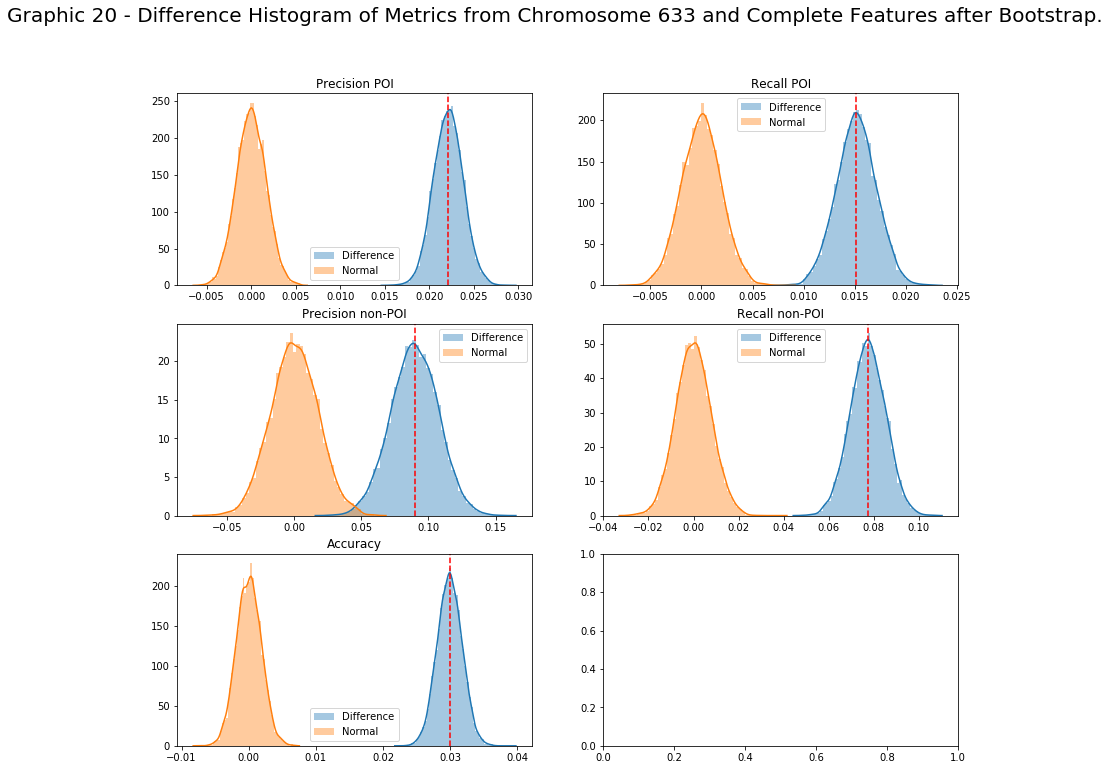

In [1091]:
# Plotting comparison.
plot_diff_hist_matrix(df_ada_633, df_ada_14,
                      title = 'Graphic 20 - Difference Histogram of Metrics from Chromosome 633 and Complete Features after Bootstrap.')

### 4.3. 

In [925]:
vamos_ver = df_ada_opt_original_bt.recall_poi - 0.30

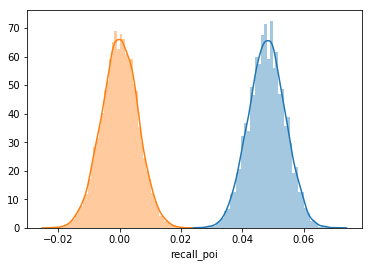

In [930]:
sns.distplot(vamos_ver)
sns.distplot(np.random.normal(0, np.std(vamos_ver), 10000))

In [1094]:
para_final

{'ada__learning_rate': [0.9],
 'ada__n_estimators': [70],
 'gauss__var_smoothing': [0],
 'knn__algorithm': ['auto'],
 'knn__leaf_size': [1],
 'knn__n_neighbors': [1],
 'knn__p': [1],
 'rand__class_weight': ['balanced'],
 'rand__criterion': ['entropy'],
 'rand__max_depth': [6],
 'rand__max_leaf_nodes': [2],
 'rand__min_samples_leaf': [2],
 'rand__min_samples_split': [2],
 'rand__n_estimators': [2],
 'svc__C': [1550],
 'svc__degree': [2],
 'svc__gamma': ['scale'],
 'svc__kernel': ['poly'],
 'tree__class_weight': ['balanced'],
 'tree__criterion': ['gini'],
 'tree__max_depth': [6],
 'tree__max_leaf_nodes': [None],
 'tree__min_samples_leaf': [2],
 'tree__min_samples_split': [4],
 'tree__splitter': ['random']}

In [1096]:
clf = AdaBoostClassifier(learning_rate = 0.9, n_estimators = 70)

In [1097]:
clf.fit(feat_eval_633, lab_eval_633)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=70, random_state=None)

In [393]:
#pipeline = Pipeline([('gauss',GaussianNB())])
pipeline = Pipeline([('tre',tree.DecisionTreeClassifier(class_weight = 'balanced'  ))])

pipeline.fit(X_train,y_train)

pred4 = pipeline.predict(X_test)

acc = accuracy_score(y_test, pred4)

recall = recall_score(y_true = y_test, y_pred = pred4)
    
precision = precision_score(y_true = y_test, y_pred = pred4)

tn, fp, fn, tp = confusion_matrix(y_test, pred4).ravel()

print confusion_matrix(y_true = y_test, y_pred = pred4)

print acc, (recall, float(tp) / (tp + fn)), (precision, float(tp) / (tp + fp))

[[26  4]
 [ 4  2]]
0.7777777777777778 (0.3333333333333333, 0.3333333333333333) (0.3333333333333333, 0.3333333333333333)


In [323]:
recall_score(y_true = y_test, y_pred = pred4, average = None)

array([0.96666667, 0.33333333])

In [327]:
print "poi:", 2.0/(2+4), "\nnon-poi", 29/30.

poi: 0.333333333333 
non-poi 0.966666666667


In [329]:
precision_score(y_true = y_test, y_pred = pred4, average = None)

array([0.87878788, 0.66666667])

In [328]:
print "poi:", 2.0/(2+1), "\nnon-poi", 29.0/(29+4.0)

poi: 0.666666666667 
non-poi 0.878787878788


In [411]:
teste = []



for i in range(0, 10000):
    
    #pipeline = Pipeline([('gauss',GaussianNB())])
    pipeline = Pipeline([('tre',tree.DecisionTreeClassifier(class_weight = 'balanced'  ))])

    pipeline.fit(X_train,y_train)

    pred4 = pipeline.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, pred4).ravel()

    recall = recall_score(y_true = y_test, y_pred = pred4, average=None)
    
    precision = precision_score(y_true = y_test, y_pred = pred4, average=None)
    
    teste.append(np.array([tn, fp, fn, tp, recall[0], recall[1], precision[0], precision[1] ]))
    


In [412]:
teste = pd.DataFrame(teste, columns = ['tn', 'fp', 'fn', 'tp', 'recall_non_poi','recall_poi', 'precision_non_poi','precision_poi'])

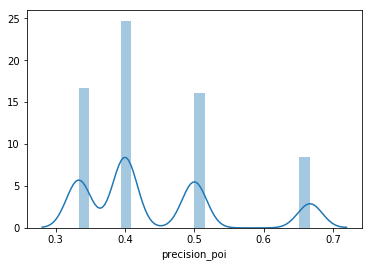

In [414]:
sns.distplot(teste.precision_poi)

In [469]:
teste2 = []

for i in range(0, 200):
    
    sss = StratifiedShuffleSplit(n_splits=2, test_size=0.25)
    
    sss.get_n_splits(feat_, lab_)
    
    
    A = np.array(feat_)
    B = np.array(lab_)
    
    for train_index, test_index in sss.split(A, B):

        X_train, X_test = A[train_index], A[test_index]
        y_train, y_test = B[train_index], B[test_index]

        clf = GaussianNB(var_smoothing=0)

        clf.fit(X_train,y_train)
        
        pred4 = pipeline.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, pred4).ravel()

        recall = recall_score(y_true = y_test, y_pred = pred4, average=None)

        precision = precision_score(y_true = y_test, y_pred = pred4, average=None)

        teste2.append(np.array([tn, fp, fn, tp, recall[0], recall[1], precision[0], precision[1] ]))


In [470]:
teste2 = pd.DataFrame(teste2, columns = ['tn', 'fp', 'fn', 'tp', 'recall_non_poi','recall_poi', 'precision_non_poi','precision_poi'])

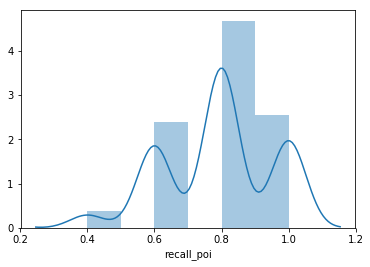

In [472]:
sns.distplot(teste2.recall_poi)

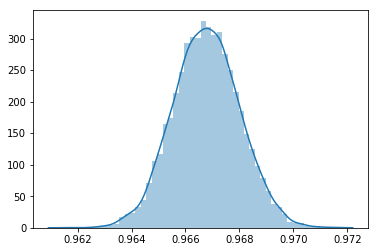

In [484]:
teste3 = []


for i in range(0, 10000):
    teste3.append(teste2.sample(200).precision_non_poi.mean())
    
sns.distplot(teste3)

In [ ]:
confusion_matrix(y_true = labels_test, y_pred = pred4)

In [ ]:
recall_score(y_true = labels_test, y_pred = pred4, average = None)

In [ ]:
precision_score(y_true = labels_test, y_pred = pred4, average = None)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true = labels_test, y_pred = pred4).ravel()

In [ ]:
# recall
float(tp) / (tp + fn)

In [ ]:
# precision
float(tp) / (tp + fp)

In [ ]:
sum(labels_test)

In [ ]:
bosta = pd.DataFrame([labels_test,pred4.tolist()], index = ['verdade','pred']).transpose()

In [ ]:
bosta.query('verdade == 0').query('pred == 0').count()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print classification_report(y_true = labels_test, y_pred = pred4)

# 5. Conclusions <a id='conclusions'></a>


# 6. Questions <a id='questions'></a>


>1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The main goal of this project is the proper understanding of all process/steps of a Machine Learning model and how to apply it. The ML process could be roughly divided into:

* Gathering data;
    * Downloading the data;
* Assessing and Cleaning data;
    * Detecting and Removing issues: Outliers, Quality error, etc.
* Selecting features;
    * Strategies to select features to compound an optimized model;
* Selecting classifier;
    * Strategies to select the classifier that well fit to the expectations;
* Tuning classifier;
    * Calibrating the parameters of the selected classifier;
* Evaluating results, and;
    * Evaluation the model based on metrics (accuracy, precision, and recall)
* Drawing conclusion.
    * Draw a conclusion founded on the model modeled.

As results of all this effort, the model will be able to predict based on last experiences, with a good margin of confidence, if a person is a Person of Interest (POI) or not.

>2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]


>3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

>4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]


In [ ]:
features_list2 = ['poi',
 'total_payments',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'from_messages',
 'to_messages','salary','ratio_from_poi','ratio_to_poi','ratio_to_from','ratio_from_poi_share','bonus',
                'other','director_fees','expenses','long_term_incentive','exercised_stock_options']

In [ ]:
# Using the defined wrapper_feat_form_split function.
labels2, features2 = wrapper_feat_form_split(my_dataset, features_list2)

# Scaling the features dataframe.
features2 = feat_scale(feat = features2)

# Using the function feat_selection().
feat_selection(k = 'all', feat = features2, lab = labels2, features_list = features_list2)[0]

>5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]


>6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]


***

# References <a id='references'></a>



* Feature Selection using LASSO [PDF][ref_01];
* Feature selection for “final” model when performing cross-validation in machine learning, Cross Validation thread, [website][ref_02];
* Perform feature normalization before or within model validation?, Cross Validation thread, [website][ref_03];
* Right order of doing feature selection, PCA and normalization?, Stack Overflow thread, [website][ref_04];
* How does SelectKBest work?, Stack Exchange thread, [website][ref_05];
* What's the meaning of p-values which produced by feature selection (i.e. chi2 method)?, Stack Overflow thread, [website][ref_06];
* Batista, D. S., Hyperparameter optimization across multiple models in scikit-learn, Blog, [website][ref_07];
* Faces recognition example using eigenfaces and SVMs, Scikit Learn Documentation, Example, [website][ref_08]; 
* Precision and Recall, Scikit Learn Documentation, [website][ref_09];
* Add new keys to a dictionary?, Stack Overflow thread, [website][ref_10];
* A fast and elitist multiobjective genetic algorithm: NSGA-II, IEEE Xplorer, [website][ref_11];
* Multi-Objective Optimization using Evolutionary Algorithms, Kalyanmoy Deb, Wiley;
* Use sklearn's GridSearchCV with a pipeline, preprocessing just once, Stack Overflow thread, [website][ref_12];
* Putting it all together, Scikit Learn Example, [website][ref_13];


[ref_01]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf
[ref_02]: https://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine
[ref_03]: https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation
[ref_04]: https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization
[ref_05]: https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
[ref_06]: https://stackoverflow.com/questions/23677734/whats-the-meaning-of-p-values-which-produced-by-feature-selection-i-e-chi2-me
[ref_07]: http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
[ref_08]: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
[ref_09]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
[ref_10]: https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
[ref_11]: https://ieeexplore.ieee.org/document/996017
[ref_12]: https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once/43366811
[ref_13]: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html



##### Scikit Learn

* F1 Score, [Website][scikit_learn_f1_score];
* Selected k Best, [Website][scikit_learn_selectedkbest];
* Feature Selection Module, [Website][scikit_learn_feat_select]
* f_classif from Feature Selection module, [Website][scikit_learn_f_classif];
* Lasso, [Website][scikit_learn_lasso];
* MinMaxScaler, [Website][scikit_learn_minmaxscaler]
* Recall Score from Metrics, [Website][scikit_learn_recall] 
* Precision Score from Metrics, [Website][scikit_learn_precision] 



[scikit_learn_f1_score]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
[scikit_learn_selectedkbest]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
[scikit_learn_f_classif]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
[scikit_learn_lasso]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
[scikit_learn_feat_select]: https://scikit-learn.org/stable/modules/feature_selection.html
[scikit_learn_minmaxscaler]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
[scikit_learn_recall]:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
[scikit_learn_precision]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html


***

In [ ]:
%load_ext version_information
%version_information pandas, numpy, pickle, platform, version_information, sklearn,seaborn, matplotlib, re

In [1103]:
dump_classifier_and_data(clf, my_dataset, features_list)

# Appendix <a id='appendix'></a>

## A.1. Given Code <a id='code'></a>

### A.1.1. `poi_id.py`

```py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)
```

In [1104]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.model_selection import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    
    
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


TypeError: 'StratifiedShuffleSplit' object is not iterable

In [1105]:
sklearn.__version__

'0.20.2'